Andre Mickael J. Que

Chelsea C. Alejandro

The dataset  currently provides summary data on used cars, offering an opportunity for descriptive analytics to understand the existing patterns and characteristic the overall goal of this project is to transition from descriptive analytics to predictive analytics.

1. clean the used car dataset by identifying and handling any null values through methods such as imputation or deletion of affected rows.

2. conduct exploratory data analysis on the cleaned dataset through visualization.

3. evaluate and compare predictive modelling to predict used car price based on vehicle manufactured date, brand, fuel, variant, kms and cities.                                                                 

In [1]:
#importing the necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
df = pd.read_csv('Downloads/Used_car_price.csv')
df.head()

,Unnamed: 0,manufactured,brand,varient,owner,fuel,type,kms,price,city
0,0,2012,Maruti,"['Swift', 'Dzire']",1st Owner,Diesel,Manual,"1,18,117 km",316399,New Delhi
1,1,2013,Maruti,['Swift'],1st Owner,Diesel,Manual,"1,14,506 km",341599,New Delhi
2,2,2014,Maruti,['Ritz'],1st Owner,Diesel,Manual,"43,382 km",344199,New Delhi
3,3,2013,Hyundai,['i20'],1st Owner,Diesel,Manual,"64,361 km",355799,New Delhi
4,4,2014,Maruti,['Swift'],1st Owner,Petrol,Manual,"1,07,206 km",401599,New Delhi


# DATA CLEANING

# In this section we are going to clean the dataset


In [2]:
# to check the number of columns and rows
df.shape

(5387, 10)

In [3]:
df.describe() #show the descriptive analysis of the dataset

,Unnamed: 0,manufactured
count,5387.000000,5387.000000
mean,245.983293,2016.240208
std,155.759659,2.472544
min,0.000000,1981.000000
25%,113.000000,2015.000000
50%,235.000000,2017.000000
75%,366.000000,2018.000000
max,699.000000,2021.000000


In [4]:
#to display the data types of each column
df.dtypes

Unnamed: 0       int64
manufactured     int64
brand           object
varient         object
owner           object
fuel            object
type            object
kms             object
price           object
city            object
dtype: object

In [5]:
# data information for each attribute
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5387 entries, 0 to 5386
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    5387 non-null   int64 
 1   manufactured  5387 non-null   int64 
 2   brand         5387 non-null   object
 3   varient       5387 non-null   object
 4   owner         5387 non-null   object
 5   fuel          5387 non-null   object
 6   type          5192 non-null   object
 7   kms           5387 non-null   object
 8   price         5387 non-null   object
 9   city          5387 non-null   object
dtypes: int64(2), object(8)
memory usage: 421.0+ KB


In [6]:
df.isnull().sum()/df.shape[0]*100 #to represents the percentage of missing values in the corresponding column of the DataFrame

Unnamed: 0      0.000000
manufactured    0.000000
brand           0.000000
varient         0.000000
owner           0.000000
fuel            0.000000
type            3.619826
kms             0.000000
price           0.000000
city            0.000000
dtype: float64

In [7]:
# to rename the unnamed to Car_Id and varient to variant
df = df.rename(columns={'Unnamed: 0': 'Car_Id'})
df = df.rename(columns={'varient': 'variant'})


In [8]:
df.sample(5) #to show the sample

,Car_Id,manufactured,brand,variant,owner,fuel,type,kms,price,city
2011,11,2016,Hyundai,"['Elite', 'i20']",1st Owner,Petrol,Manual,"1,29,789 km",521099,Mumbai
4218,185,2014,Maruti,['Swift'],1st Owner,Petrol,Manual,"37,144 km",423899,Kolkata
4715,28,2017,Tata,['Tiago'],First Owner,Petrol,manual,"33,000 kms","4,50,000",ahmedabad
991,491,2015,Hyundai,"['Elite', 'i20']",1st Owner,Diesel,Manual,"69,970 km",507299,Noida
3384,384,2016,Maruti,['Celerio'],2nd Owner,Petrol,Automatic,"21,156 km",482599,Bengaluru


In [9]:
#Data Cleaning
#Remove all the comma in the dataset as you can see in the variant the 'Vitara', 'Brezza' has a comma, im going to implement
#this code to remove all of the comma in the dataset.
df.replace(',','', regex=True, inplace=True)
df.head(15)

,Car_Id,manufactured,brand,variant,owner,fuel,type,kms,price,city
0,0,2012,Maruti,['Swift' 'Dzire'],1st Owner,Diesel,Manual,118117 km,316399,New Delhi
1,1,2013,Maruti,['Swift'],1st Owner,Diesel,Manual,114506 km,341599,New Delhi
2,2,2014,Maruti,['Ritz'],1st Owner,Diesel,Manual,43382 km,344199,New Delhi
3,3,2013,Hyundai,['i20'],1st Owner,Diesel,Manual,64361 km,355799,New Delhi
4,4,2014,Maruti,['Swift'],1st Owner,Petrol,Manual,107206 km,401599,New Delhi
5,5,2013,Honda,['City'],1st Owner,Petrol,Manual,44119 km,461199,New Delhi
6,6,2013,Maruti,['Swift'],1st Owner,Diesel,Manual,45417 km,345299,New Delhi
7,7,2011,Hyundai,['i20'],1st Owner,Petrol,Manual,29080 km,313099,New Delhi
8,8,2018,Maruti,['Wagon' 'R' '1.0'],1st Owner,Petrol,Manual,11773 km,476799,New Delhi
9,9,2017,Maruti,['Ciaz'],1st Owner,Diesel,Manual,82599 km,625999,New Delhi


In [10]:
# it's counting how many times the 'variant' column has the value '[]'.
df.query("variant == '[]'")['variant'].count()

2

In [11]:
#lets replace the '[]' to 0
df.loc[df['variant'] == '[]', 'variant'] = 0
# and now you can see here the "[]" is changed to zero value
df.query("variant == '[]'")['variant'].count()

0

In [12]:
#extracting the unique values in the "variant" column
df.variant.unique()

array(["['Swift' 'Dzire']", "['Swift']", "['Ritz']", "['i20']",
       "['City']", "['Wagon' 'R' '1.0']", "['Ciaz']", "['Fiesta']",
       "['S60']", "['Baleno']", "['Tiago']", "['Verna']", "['Fortuner']",
       "['X3']", "['AURA']", "['Tucson' 'New']", "['3' 'Series']",
       "['TUV300']", "['S' 'Cross']", "['New' 'Wagon-R']", "['Xcent']",
       "['Bolero']", "['IGNIS']", "['New' 'Figo']", "['i10']",
       "['Creta']", "['Elite' 'i20']", "['Redi' 'Go']", "['VENUE']",
       "['Ecosport']", "['Dzire']", "['Q3']", "['Glanza']",
       "['Grand' 'i10']", "['HECTOR']", "['Innova']",
       "['Vitara' 'Brezza']", "['Amaze']", "['Ertiga']", "['Superb']",
       "['WR-V']", "['Jazz']", "['Kwid']", "['Figo' 'Aspire']",
       "['YARIS']", "['Corolla' 'Altis']", "['Brio']", "['Duster']",
       "['S' 'PRESSO']", "['Etios' 'Liva']", "['Alto' 'K10']",
       "['Etios']", "['Polo']", "['Alto']", "['Alto' '800']",
       "['XUV500']", "['5' 'Series']", "['Celerio']", "['Eon']",
       "['Vento

In [13]:
#cleaning the variant column, removing the square brackets, single qoutes, replacing commas with spaces and to standardize the 
#representation of variant names in 'variant' column for better consistency and analysis.
df['variant'] = df["variant"].str.replace("^\['|'\]$","")
df['variant'] = df["variant"].str.replace("'","")
df['variant'] = df["variant"].str.replace(","," ")
df['variant'] = df["variant"].str.replace("I20","i20")
df['variant'] = df["variant"].str.replace("NEW","New")
df['variant'] = df["variant"].str.replace("AURA","Aura")
df['variant'] = df["variant"].str.replace("IGNIS","Ignis")
df['variant'] = df["variant"].str.replace("VENUE","Venue")
df['variant'] = df["variant"].str.replace("HECTOR","Hector")
df['variant'] = df["variant"].str.replace("S  PRESSO","S-Presso")
df['variant'] = df["variant"].str.replace("GRAND  I10  NIOS","Grand  i10  Nios")
df['variant'] = df["variant"].str.replace("FREESTYLE","Freestyle")
df['variant'] = df["variant"].str.replace("NEXON","Nexon")
df['variant'] = df["variant"].str.replace("SELTOS","Seltos")
df['variant'] = df["variant"].str.replace("MARAZZO","Marazzo")
df['variant'] = df["variant"].str.replace("SANTRO","Santro")
df['variant'] = df["variant"].str.replace("OMNI","Omni")
df['variant'] = df["variant"].str.replace("TRIBER","Triber")
df['variant'] = df["variant"].str.replace("KWID","Kwid")
df['variant'] = df["variant"].str.replace("KWID","Kwid")


In [14]:
#lsting the different brands corresponding to the variants for future use.
df.brand.unique()

array(['Maruti', 'Hyundai', 'Honda', 'Ford', 'Volvo', 'Tata', 'Toyota',
       'BMW', 'Mahindra', 'Datsun', 'Audi', 'MG', 'Skoda', 'Renault',
       'Volkswagen', 'HYUNDAI', 'Nissan', 'KIA', 'Jeep', 'Mercedes',
       'Landrover', 'Jaguar', 'Kia', 'Chevrolet', 'Mercedes-Benz',
       'Mitsubishi', 'Ambassador', 'Land'], dtype=object)

In [15]:
#this code is performing brand name standardization by converting certain brand names to title case 
# (e.g., 'HYUNDAI' to 'Hyundai', 'KIA' to 'Kia', 'Mercedes-Benz' to 'Mercedes') 
# and removing rows where the brand is 'Land' from the DataFrame.
df.replace('HYUNDAI','Hyundai', regex=True, inplace=True)
df.replace('KIA','Kia', regex=True, inplace=True)
df.replace('Mercedes-Benz','Mercedes', regex=True, inplace=True)
df = df[df.brand != 'Land']

This code appends the prefix 'Maruti ' to the 'variant' column for rows where the 'brand' column equals 'Maruti'. The DataFrame is directly updated with this modification. For instance, if the original 'variant' column contained values such as 'Swift', 'Baleno', etc., after executing this operation, those specific rows will now display 'Maruti Swift', 'Maruti Baleno', and so on in the 'variant' column.

In [16]:
brands = [
    'Maruti', 'Hyundai', 'Honda', 'Ford', 'Volvo',
    'Tata', 'BMW', 'Toyota', 'Mahindra', 'Datsun',
    'Audi', 'MG', 'Renault', 'Volkswagen', 'Skoda',
    'Nissan', 'Kia', 'Jeep', 'Mercedes', 'Landrover',
    'Jaguar', 'Chevrolet', 'Mitsubishi'
]

for brand in brands:
    mask = (df['brand'] == brand)
    df.loc[mask, 'variant'] = f'{brand} ' + df['variant'].astype(str)

In [17]:
df.sample(5) #to show the sample

,Car_Id,manufactured,brand,variant,owner,fuel,type,kms,price,city
3449,5,2018,Maruti,Maruti [Vitara Brezza],2nd Owner,Diesel,Manual,81477 km,820699,Hyderabad
4793,106,2014,Maruti,Maruti [Alto K10],-,Petrol,manual,17503 kms,330000,bangalore
2009,9,2016,Mahindra,Mahindra [TUV300],1st Owner,Diesel,Manual,61131 km,640399,Mumbai
966,466,2013,Hyundai,Hyundai [i20],1st Owner,Diesel,Manual,37840 km,353899,Noida
3281,281,2015,Hyundai,Hyundai [Elite i20],1st Owner,Diesel,Manual,63278 km,666599,Bengaluru


In [18]:
#checking for null values 
df.isna().sum()


Car_Id            0
manufactured      0
brand             0
variant           2
owner             0
fuel              0
type            195
kms               0
price             0
city              0
dtype: int64

In [19]:
# Imputation of mode for 'variant' column
df['variant'] = df['variant'].fillna(df['variant'].mode()[0])

# Imputation of mode for 'type' column
df['type'] = df['type'].fillna(df['type'].mode()[0])

In [20]:
df.isna().sum() #checking the no null values column

Car_Id          0
manufactured    0
brand           0
variant         0
owner           0
fuel            0
type            0
kms             0
price           0
city            0
dtype: int64

In [21]:
#Checking for the unique values of type column
df.type.unique()

array(['Manual', 'Automatic', 'manual', 'automatic'], dtype=object)

In [22]:
#Replacing the small "manual" to Manual and small "automatic" to Automatic
df.replace('manual','Manual', regex=True, inplace=True)
df.replace('automatic','Automatic', regex=True, inplace=True)
df.type.unique()

array(['Manual', 'Automatic'], dtype=object)

In [23]:
#Getting the mode of the type column
df['type'].mode()

0    Manual
Name: type, dtype: object

In [24]:
#checking for duplicates
df.duplicated().sum()

500

In [25]:
#Dropping the duplicates
df = df.drop_duplicates()
df.duplicated().sum()

0

In [26]:
# Checking the distribution for "fuel", "owner", "type"
print("Fuel:\n", df.groupby('fuel').size())
print("\nOwner:\n", df.groupby('owner').size())
print("\nType:\n", df.groupby('type').size())

Fuel:
 fuel
CNG                8
Diesel          1508
Petrol          3343
Petrol + CNG      26
Petrol + LPG       1
dtype: int64

Owner:
 owner
-                490
1st Owner       3392
2nd Owner        729
3rd Owner         61
4th Owner          5
First Owner      163
Second Owner      40
Third Owner        6
dtype: int64

Type:
 type
Automatic     518
Manual       4368
dtype: int64


In [27]:
# Optimizing the 'fuel' column and removing 'Petrol + LPG' 'and petrol + cng'
df['fuel'] = df['fuel'].replace({'Petrol + CNG': 'CNG'})
df = df[df['fuel'] != 'Petrol + LPG']

df.fuel.value_counts()

fuel
Petrol    3343
Diesel    1508
CNG         34
Name: count, dtype: int64

In [28]:
# replacing the "First owner" to 1st Owner, "Second Owner" to 2nd ownder and so on.
df.replace('First Owner','1st Owner', regex=True, inplace=True)
df.replace('Second Owner','2nd Owner', regex=True, inplace=True)
df.replace('Third Owner','3rd Owner', regex=True, inplace=True)
df.owner.unique()

array(['1st Owner', '2nd Owner', '3rd Owner', '4th Owner', '-'],
      dtype=object)

In [29]:
#Replacing the empty value to Null
df.replace('-', np.nan, inplace=True)
df.isna().sum()

Car_Id            0
manufactured      0
brand             0
variant           0
owner           490
fuel              0
type              0
kms               0
price             0
city              0
dtype: int64

In [30]:
# Imputation of mode for 'owner' column
df['owner'] = df['owner'].fillna(df['owner'].mode()[0])

In [31]:
df.isna().sum() #showing the null cleaned column 

Car_Id          0
manufactured    0
brand           0
variant         0
owner           0
fuel            0
type            0
kms             0
price           0
city            0
dtype: int64

In [32]:
# Removing km/kms to convert the 'kms' column to integer
df['kms'] = df['kms'].str.replace(r'\D', '', regex=True).astype(int)

In [33]:
df.head()

,Car_Id,manufactured,brand,variant,owner,fuel,type,kms,price,city
0,0,2012,Maruti,Maruti [Swift Dzire],1st Owner,Diesel,Manual,118117,316399,New Delhi
1,1,2013,Maruti,Maruti [Swift],1st Owner,Diesel,Manual,114506,341599,New Delhi
2,2,2014,Maruti,Maruti [Ritz],1st Owner,Diesel,Manual,43382,344199,New Delhi
3,3,2013,Hyundai,Hyundai [i20],1st Owner,Diesel,Manual,64361,355799,New Delhi
4,4,2014,Maruti,Maruti [Swift],1st Owner,Petrol,Manual,107206,401599,New Delhi


In [34]:
df.dtypes #checking the types of data stored in each column

Car_Id           int64
manufactured     int64
brand           object
variant         object
owner           object
fuel            object
type            object
kms              int32
price           object
city            object
dtype: object

In [35]:
#Checking for the unique value for the city column
df.city.unique()

array(['New Delhi', 'Noida', 'Gurgaon', 'Mumbai', 'Pune', 'Bengaluru',
       'Hyderabad', 'Chennai', 'Kolkata', 'Ahmedabad', 'ahmedabad',
       'bangalore', 'chennai', 'delhi-ncr', 'gurgaon', 'hyderabad',
       'jaipur', 'kolkata', 'mumbai', 'new-delhi', 'noida'], dtype=object)

In [36]:
#Checking for the value counts for city column
df.city.value_counts()

city
New Delhi    500
Gurgaon      500
Mumbai       500
Pune         500
Noida        500
Chennai      488
Bengaluru    443
Ahmedabad    383
Kolkata      271
Hyderabad    101
chennai       80
kolkata       80
hyderabad     60
mumbai        60
jaipur        60
ahmedabad     60
gurgaon       60
delhi-ncr     60
bangalore     60
noida         60
new-delhi     59
Name: count, dtype: int64

In [37]:
# Mapping dictionary for city optimization
city_mapping = {
    'new-delhi': 'New Delhi',
    'noida': 'Noida',
    'gurgaon': 'Gurgaon',
    'mumbai': 'Mumbai',
    'bangalore': 'Bengalore',
    'chennai': 'Chennai',
    'ahmedabad': 'Ahmedabad',
    'hyderabad': 'Hyderabad',
    'kolkata': 'Kolkata',
    'jaipur': 'Jaipur',
    'delhi-ncr': 'Delhi Ncr'
}

# Optimizing the 'city' column
df['city'] = df['city'].replace(city_mapping, regex=True)

# Checking the value counts after optimization
print(df['city'].value_counts())

city
Chennai      568
Noida        560
Gurgaon      560
Mumbai       560
New Delhi    559
Pune         500
Bengaluru    443
Ahmedabad    443
Kolkata      351
Hyderabad    161
Bengalore     60
Delhi Ncr     60
Jaipur        60
Name: count, dtype: int64


In [38]:
df.describe() #display the descriptive analysis

,Car_Id,manufactured,kms
count,4885.000000,4885.000000,4885.000000
mean,245.559468,2016.197339,46793.330604
std,156.826733,2.504286,33900.830587
min,0.000000,1981.000000,58.000000
25%,112.000000,2015.000000,21303.000000
50%,234.000000,2017.000000,39046.000000
75%,365.000000,2018.000000,65316.000000
max,699.000000,2021.000000,276914.000000


In [39]:
# Convert the "price" column to string type
df["price"] = df["price"].astype(str)

# Filter rows where "price" column contains numeric values
numeric_mask = df["price"].apply(lambda x: x.isnumeric())

# Apply the numeric mask to filter the DataFrame
df = df[numeric_mask]

# Convert the "price" column to integer
df["price"] = df["price"].astype(int)

In [40]:
df.describe()#displaying the descriptive analysis

,Car_Id,manufactured,kms,price
count,4885.000000,4885.000000,4885.000000,4.885000e+03
mean,245.559468,2016.197339,46793.330604,5.856386e+05
std,156.826733,2.504286,33900.830587,3.291562e+05
min,0.000000,1981.000000,58.000000,2.800000e+04
25%,112.000000,2015.000000,21303.000000,3.837990e+05
50%,234.000000,2017.000000,39046.000000,5.067990e+05
75%,365.000000,2018.000000,65316.000000,6.900000e+05
max,699.000000,2021.000000,276914.000000,4.290000e+06


In [41]:
# will only contain rows where the 'price' column is less than 2 million
df = df.loc[df['price'] < 2e6].reset_index(drop=True)


In [42]:
# Sort the DataFrame in descending order based on 'price'
sorted_cars_by_price = df.sort_values(by='price', ascending=False)

# Find the maximum 'price' value
max_price_value = sorted_cars_by_price['price'].max()

# Filter rows with the maximum 'price' value
top_cars_highest_price = sorted_cars_by_price[sorted_cars_by_price['price'] == max_price_value]

# Displaying the result
print(f"Cars with the highest price of the cara ({max_price_value} price):")
print(top_cars_highest_price)

Cars with the highest price of the cara (1950000 price):
      Car_Id  manufactured brand      variant      owner    fuel       type  \
4294     127          2021    MG  MG [Hector]  1st Owner  Petrol  Automatic   

       kms    price     city  
4294  3500  1950000  Chennai  


In [43]:
# Sort the DataFrame in descending order based on 'kms'
sorted_cars_by_kms = df.sort_values(by='kms', ascending=False)

# Find the maximum 'kms' value
max_kms_value = sorted_cars_by_kms['kms'].max()

# Filter rows with the maximum 'kms' value
top_cars_highest_kms = sorted_cars_by_kms[sorted_cars_by_kms['kms'] == max_kms_value]

# Display the result
print(f"Cars with the highest kilometers driven ({max_kms_value} kms):")
print(top_cars_highest_kms)

Cars with the highest kilometers driven (276914 kms):
      Car_Id  manufactured   brand            variant      owner    fuel  \
2038      48          2015  Toyota  Toyota [Fortuner]  1st Owner  Diesel   

        type     kms    price  city  
2038  Manual  276914  1382699  Pune  


In [44]:
#Create a copy of the cleaned dataset
used_car = df.copy()

In [45]:
used_car 

,Car_Id,manufactured,brand,variant,owner,fuel,type,kms,price,city
0,0,2012,Maruti,Maruti [Swift Dzire],1st Owner,Diesel,Manual,118117,316399,New Delhi
1,1,2013,Maruti,Maruti [Swift],1st Owner,Diesel,Manual,114506,341599,New Delhi
2,2,2014,Maruti,Maruti [Ritz],1st Owner,Diesel,Manual,43382,344199,New Delhi
3,3,2013,Hyundai,Hyundai [i20],1st Owner,Diesel,Manual,64361,355799,New Delhi
4,4,2014,Maruti,Maruti [Swift],1st Owner,Petrol,Manual,107206,401599,New Delhi
...,...,...,...,...,...,...,...,...,...,...
4850,695,2013,Hyundai,Hyundai [i10],1st Owner,Petrol,Manual,56020,291500,Noida
4851,696,2013,Hyundai,Hyundai [Verna],1st Owner,Petrol,Manual,79174,450000,Noida
4852,697,2014,Maruti,Maruti [Wagon R],1st Owner,Petrol,Manual,74492,278000,Noida
4853,698,2012,Hyundai,Hyundai [i10],1st Owner,Petrol,Manual,27456,237000,Noida


In [46]:
#sorted brands
used_car['brand'].value_counts()

brand
Maruti        2403
Hyundai       1091
Honda          305
Ford           298
Renault        182
Toyota         142
Volkswagen      98
Tata            94
Mahindra        82
Datsun          26
BMW             23
MG              21
Nissan          20
Kia             18
Skoda           15
Jeep            14
Chevrolet        7
Mercedes         5
Volvo            3
Audi             3
Ambassador       2
Landrover        1
Jaguar           1
Mitsubishi       1
Name: count, dtype: int64

In [47]:
#Checking how many different type of unique values
used_car.variant.nunique()

143

In [48]:
#There are 25 unique brand with Maruti brand is most available for purchase/sold followed by Hyundai.

#Drop the row with no varient
used_car.dropna(subset=['variant'],axis=0,inplace=True)

In [49]:
#Check for the varient returning the 30 largest and to identify most common car variants and the most popular
used_car['variant'].value_counts().nlargest(30)

variant
Maruti [Swift]            402
Hyundai [Grand i10]       292
Maruti [Alto 800]         265
Maruti [Baleno]           262
Ford [Ecosport]           223
Maruti [Vitara Brezza]    207
Maruti [Swift Dzire]      198
Hyundai [Elite i20]       182
Maruti [Alto K10]         173
Maruti [Wagon R 1.0]      161
Renault [Kwid]            148
Hyundai [Creta]           123
Maruti [Celerio]          111
Honda [City]              104
Hyundai [i20]              91
Hyundai [i10]              89
Honda [Amaze]              80
Maruti [Alto]              79
Maruti [Eeco]              76
Maruti [Ignis]             72
Maruti [Ciaz]              70
Maruti [Ertiga]            67
Maruti [Dzire]             65
Hyundai [Verna]            62
Volkswagen [Polo]          61
Hyundai [Eon]              49
Tata [Tiago]               48
Maruti [S Cross]           41
Hyundai [Venue]            41
Honda [Jazz]               39
Name: count, dtype: int64

In [50]:
used_car.head()

,Car_Id,manufactured,brand,variant,owner,fuel,type,kms,price,city
0,0,2012,Maruti,Maruti [Swift Dzire],1st Owner,Diesel,Manual,118117,316399,New Delhi
1,1,2013,Maruti,Maruti [Swift],1st Owner,Diesel,Manual,114506,341599,New Delhi
2,2,2014,Maruti,Maruti [Ritz],1st Owner,Diesel,Manual,43382,344199,New Delhi
3,3,2013,Hyundai,Hyundai [i20],1st Owner,Diesel,Manual,64361,355799,New Delhi
4,4,2014,Maruti,Maruti [Swift],1st Owner,Petrol,Manual,107206,401599,New Delhi


In [51]:
#Checking for zero values
used_car.query("kms == '0'")['kms'].count()

0

In [52]:
##Checking for zero values
used_car.query("price == '0'")['price'].count()

0

In [53]:
used_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4855 entries, 0 to 4854
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Car_Id        4855 non-null   int64 
 1   manufactured  4855 non-null   int64 
 2   brand         4855 non-null   object
 3   variant       4855 non-null   object
 4   owner         4855 non-null   object
 5   fuel          4855 non-null   object
 6   type          4855 non-null   object
 7   kms           4855 non-null   int32 
 8   price         4855 non-null   int32 
 9   city          4855 non-null   object
dtypes: int32(2), int64(2), object(6)
memory usage: 341.5+ KB


In [54]:
used_car.describe()

,Car_Id,manufactured,kms,price
count,4855.000000,4855.000000,4855.000000,4.855000e+03
mean,245.502163,2016.192173,46807.670855,5.728550e+05
std,156.576731,2.506346,33932.601669,2.817077e+05
min,0.000000,1981.000000,58.000000,2.800000e+04
25%,112.000000,2015.000000,21363.500000,3.830000e+05
50%,234.000000,2017.000000,39019.000000,5.049990e+05
75%,365.000000,2018.000000,65316.000000,6.855995e+05
max,699.000000,2021.000000,276914.000000,1.950000e+06


In [55]:
#dropping the car id because we dont need it now
used_car =used_car.drop(columns=['Car_Id'])

In [56]:
used_car

,manufactured,brand,variant,owner,fuel,type,kms,price,city
0,2012,Maruti,Maruti [Swift Dzire],1st Owner,Diesel,Manual,118117,316399,New Delhi
1,2013,Maruti,Maruti [Swift],1st Owner,Diesel,Manual,114506,341599,New Delhi
2,2014,Maruti,Maruti [Ritz],1st Owner,Diesel,Manual,43382,344199,New Delhi
3,2013,Hyundai,Hyundai [i20],1st Owner,Diesel,Manual,64361,355799,New Delhi
4,2014,Maruti,Maruti [Swift],1st Owner,Petrol,Manual,107206,401599,New Delhi
...,...,...,...,...,...,...,...,...,...
4850,2013,Hyundai,Hyundai [i10],1st Owner,Petrol,Manual,56020,291500,Noida
4851,2013,Hyundai,Hyundai [Verna],1st Owner,Petrol,Manual,79174,450000,Noida
4852,2014,Maruti,Maruti [Wagon R],1st Owner,Petrol,Manual,74492,278000,Noida
4853,2012,Hyundai,Hyundai [i10],1st Owner,Petrol,Manual,27456,237000,Noida


In [57]:
used_car.to_csv('Used_car_price_cleaned.csv') #convert to clean csv

Exploratory analysis through statistic and visualization

the code below provides a concise way to visualize the distribution of categorical variables in the used_car_price dataset

C:\Users\User\AppData\Local\Temp\ipykernel_13728\312330805.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(used_car['price'])


Skewness: 1.778747
Kurtosis: 4.254587


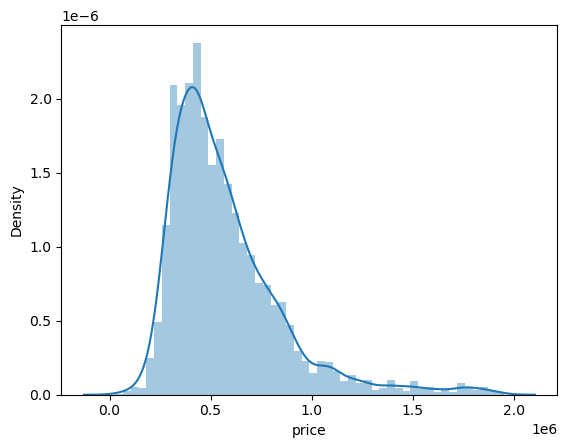

In [58]:
sn.distplot(used_car['price'])

print("Skewness: %f" % used_car['price'].skew())
print("Kurtosis: %f" % used_car['price'].kurt())

In [59]:
def detect_outliers(data):
    outliers = []
    threshold = 3
    mean = np.mean(data)
    std = np.std(data)
    for i in data :
        z_score = (i-mean)/std
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return (outliers)

In [60]:
print(detect_outliers(used_car['price']))
print(detect_outliers(used_car['kms']))
print(detect_outliers(used_car['manufactured'])) #outliers for price,kilometers and manufactured.

[1843799, 1642499, 1783499, 1603999, 1491399, 1886699, 1535299, 1802899, 1721299, 1569599, 1751899, 1843799, 1642499, 1783499, 1603999, 1491399, 1886699, 1535299, 1802899, 1721299, 1569599, 1751899, 1843799, 1642499, 1783499, 1603999, 1491399, 1886699, 1535299, 1802899, 1721299, 1569599, 1751899, 1841599, 1705599, 1752099, 1761099, 1689399, 1861099, 1447599, 1855299, 1786399, 1423199, 1750999, 1454299, 1696299, 1836899, 1491099, 1720799, 1933599, 1760999, 1750099, 1776499, 1469299, 1465799, 1642699, 1538099, 1766799, 1700799, 1740899, 1615899, 1917299, 1642799, 1496799, 1492699, 1514599, 1872099, 1476599, 1634599, 1801999, 1432599, 1423599, 1854899, 1750999, 1486399, 1636899, 1503999, 1786499, 1447999, 1808399, 1831699, 1839299, 1495999, 1570499, 1544699, 1941799, 1497899, 1722699, 1523899, 1601299, 1629999, 1590000, 1490000, 1585000, 1950000, 1490000, 1550000, 1748000, 1657700, 1490000, 1739000, 1490000, 1649000, 1899000, 1555000, 1490000, 1881500, 1490000]
[199598, 169197, 154297, 15

In [61]:
# Select only numeric columns
numeric_columns = used_car.select_dtypes(include=['number'])

# Calculate Quantiles
Q1 = numeric_columns.quantile(0.25)
Q3 = numeric_columns.quantile(0.75)

# Calculate Interquartile Range (IQR)
IQR = Q3 - Q1

print(IQR) #analyzing the spread of numeric data in each column on the used car dataset.

manufactured         3.0
kms              43952.5
price           302599.5
dtype: float64


C:\Users\User\AppData\Local\Temp\ipykernel_13728\2355971964.py:16: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_13728\2355971964.py:16: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_13728\2355971964.py:16: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_13728\2355971964.py:16: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


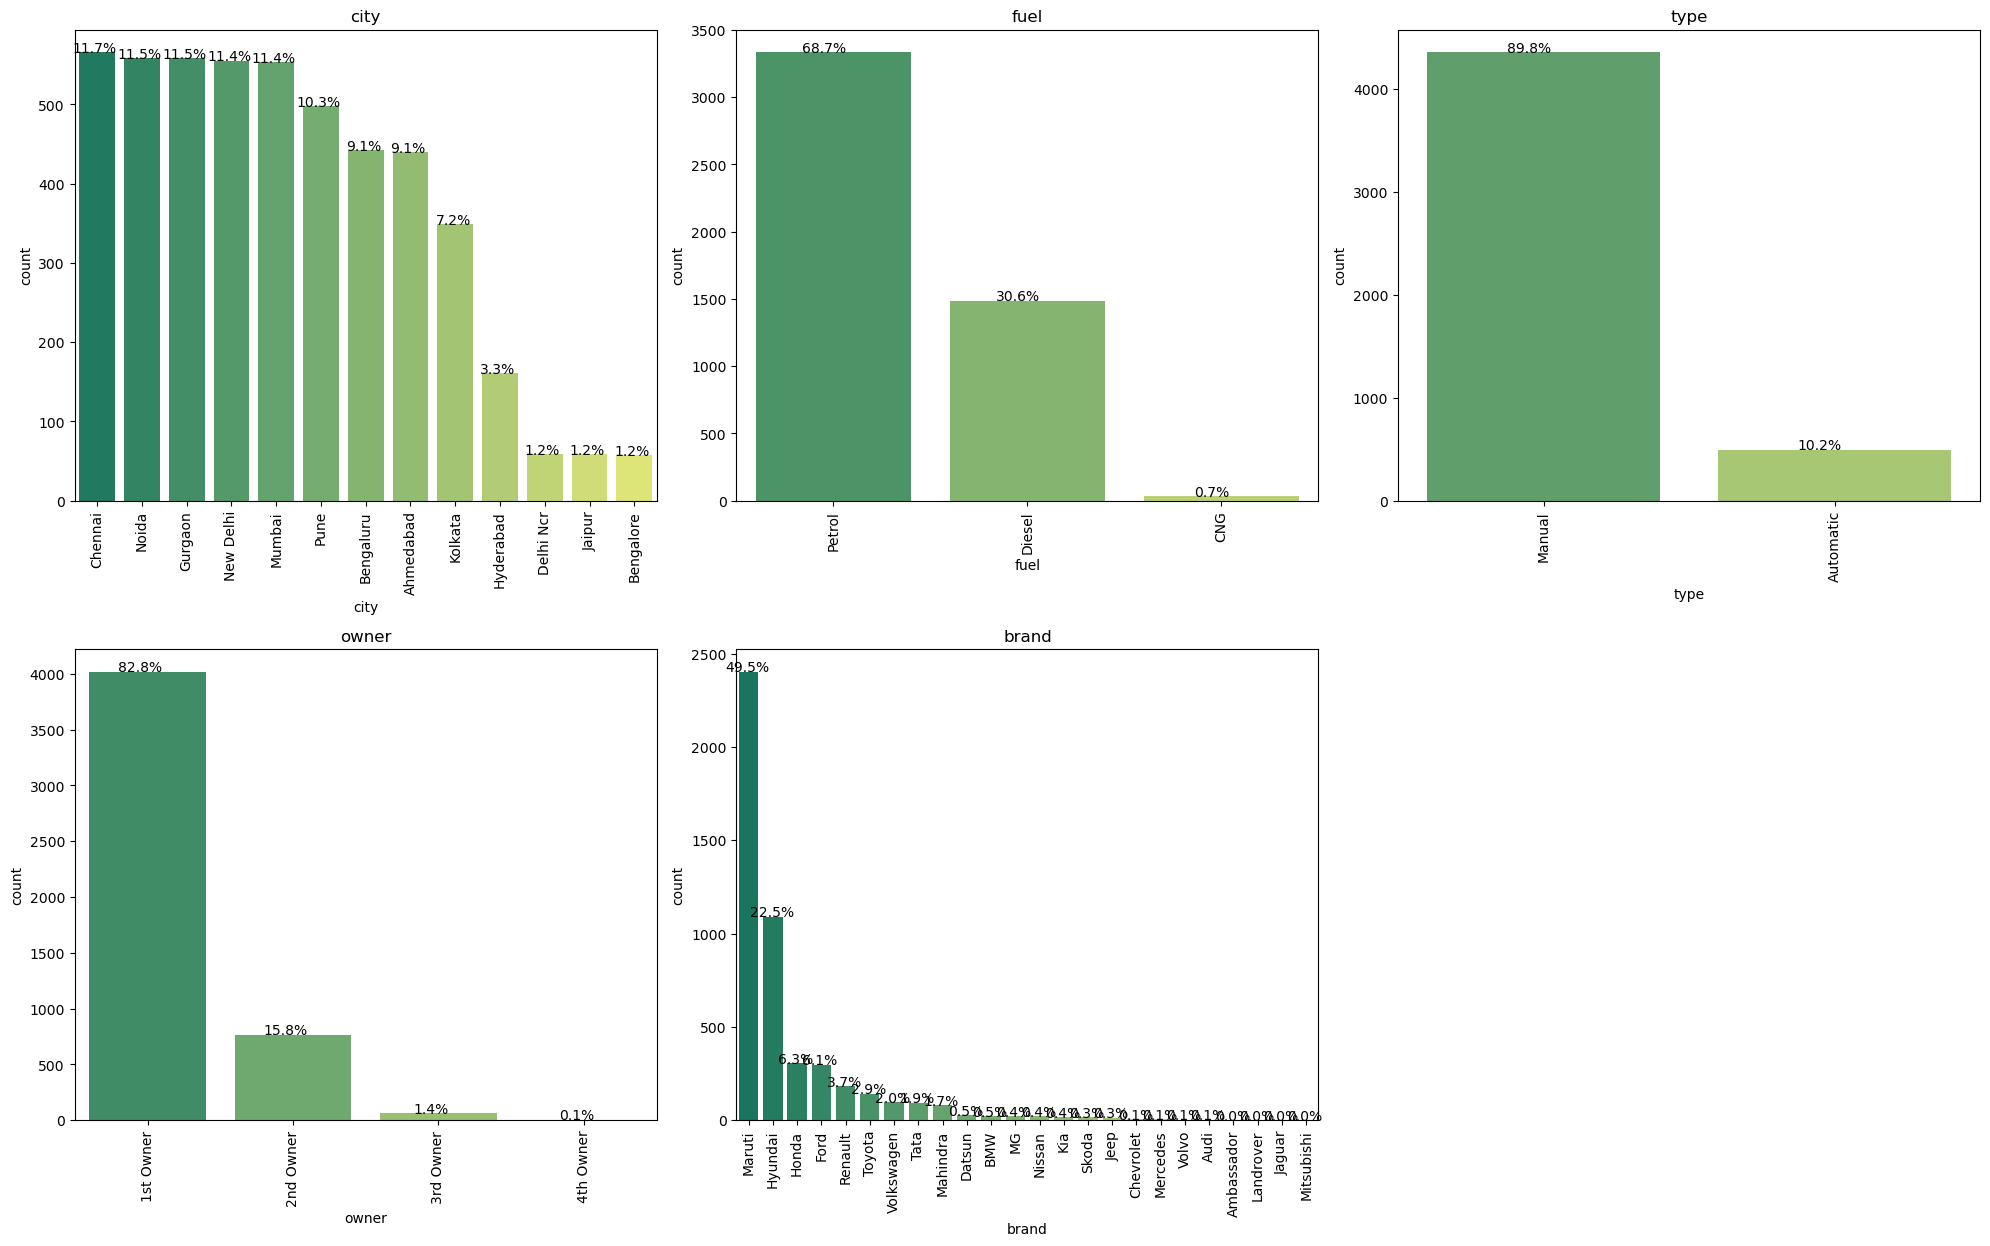

In [62]:
#visualization for city, fuel, type, owner and brand
car_columns = ['city', 'fuel', 'type', 'owner', 'brand']

plt.figure(figsize=(20, 30))

for i, variable in enumerate(car_columns):
    plt.subplot(5, 3, i+1)
    order = used_car[variable].value_counts(ascending=False).index    
    ax = sn.countplot(x=used_car[variable], data=used_car, order=order, palette='summer')
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / len(used_car[variable]))
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        plt.annotate(percentage, (x, y), ha='center')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.title(variable)

plt.show() #distribution of data.

C:\Users\User\AppData\Local\Temp\ipykernel_13728\146804946.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_13728\146804946.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


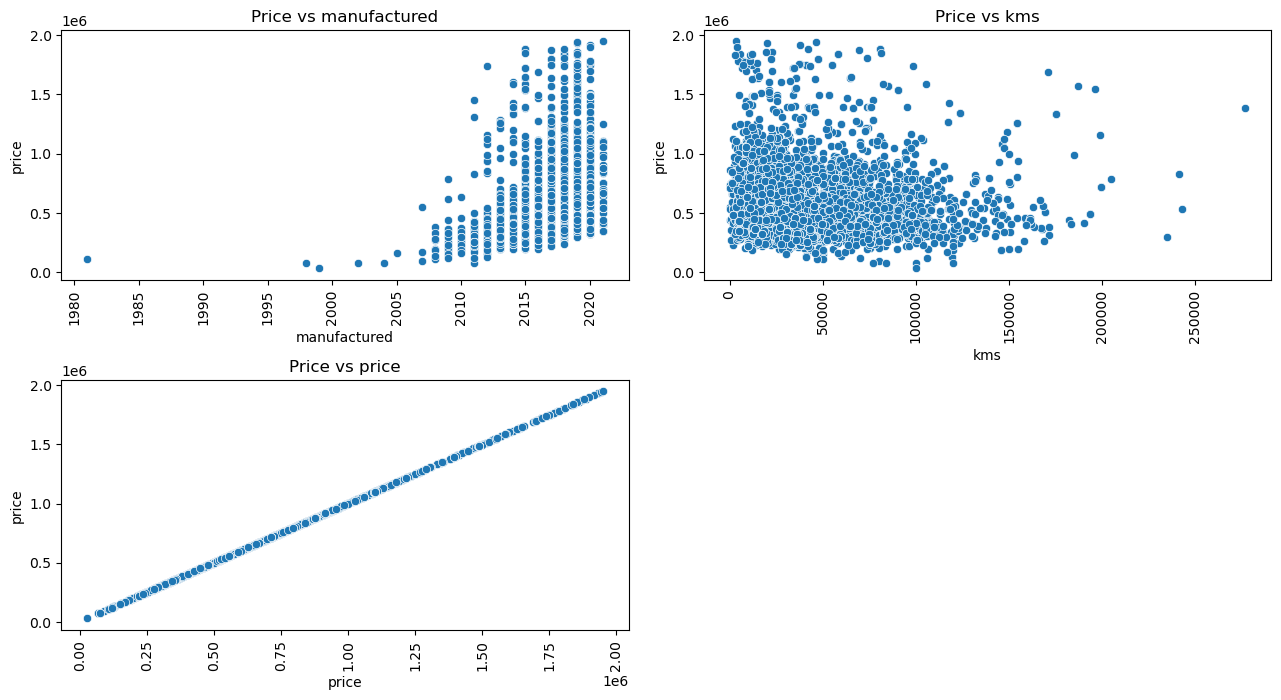

In [63]:
# this code provides a quick visual overview of how the 'price' variable relates to each numeric variable in the dataset,
#helping to identify potential patterns or trends.

numeric_columns = used_car.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(13, 17))

for i, variable in enumerate(numeric_columns):
    plt.subplot(5, 2, i+1)
    sn.scatterplot(x=used_car[variable], y=used_car['price']).set(title=f'Price vs {variable}')
    plt.xticks(rotation=90)
    plt.tight_layout()

plt.show() 


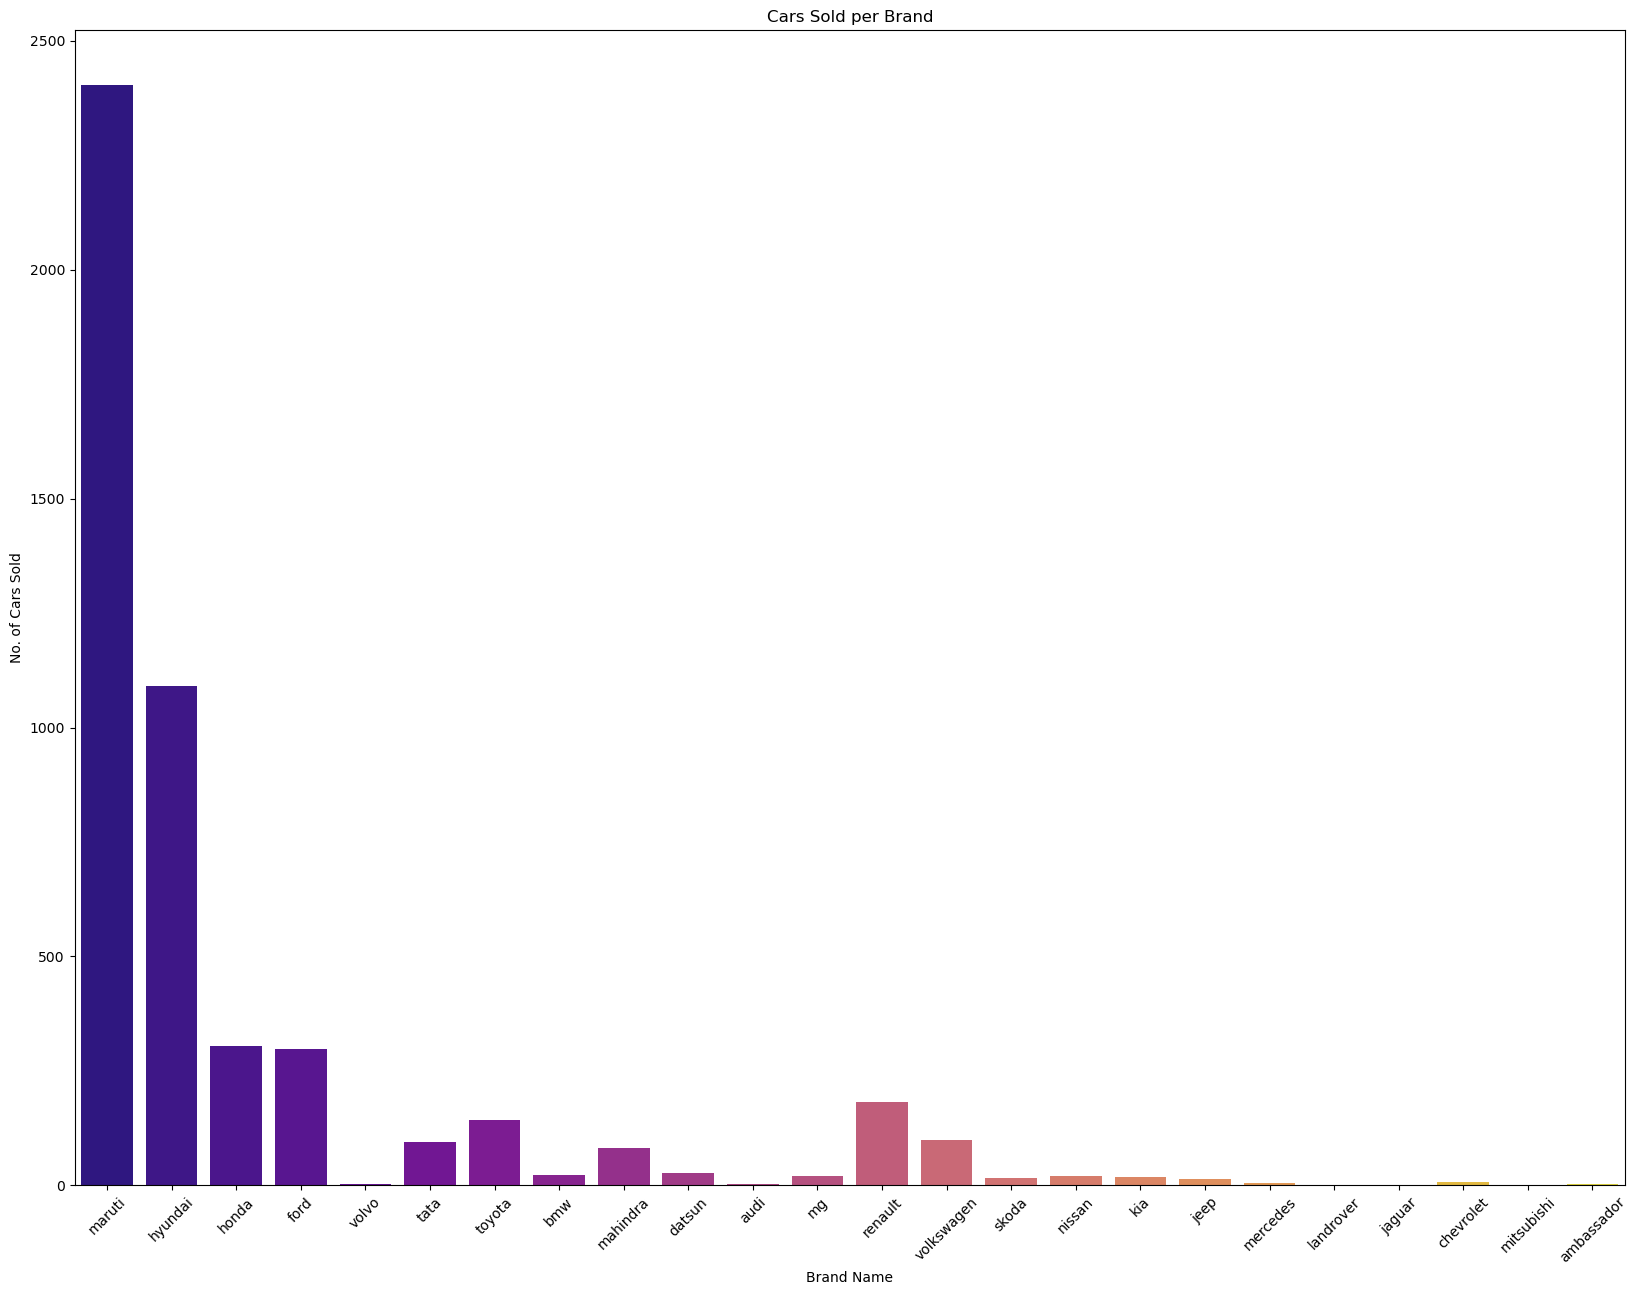

In [64]:
# visualization of Cars sold per brand
plt.figure(figsize=(20, 15))
sn.countplot(x=used_car['brand'].str.lower().str.split().str.get(0), palette='plasma')
plt.xlabel('Brand Name')
plt.ylabel('No. of Cars Sold')
plt.title('Cars Sold per Brand')
plt.xticks(rotation=45)
plt.show() #visual presentation of the distribution of cars sold for each brand.


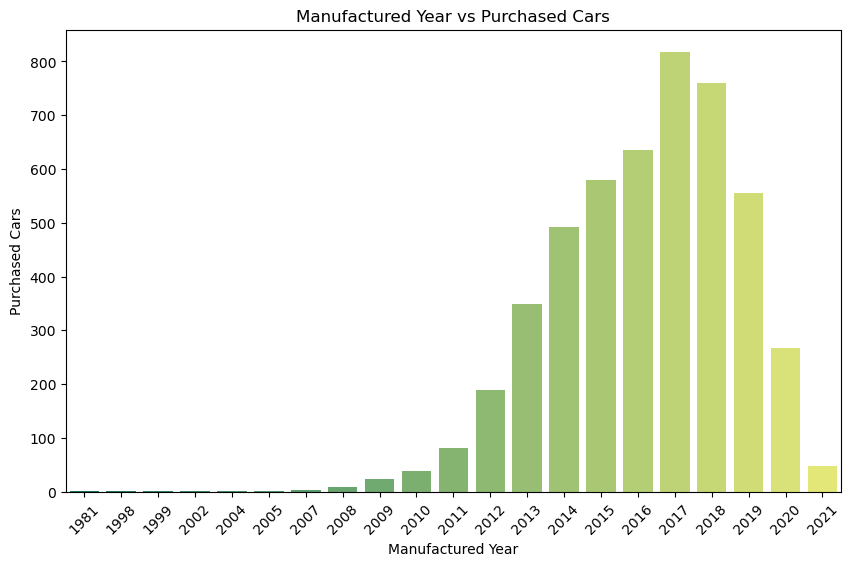

In [65]:
#visualization of Manufactured Year and Cars
plt.figure(figsize=(10, 6))
sn.countplot(x='manufactured', data=used_car, palette='summer')
plt.xlabel("Manufactured Year")
plt.ylabel("Purchased Cars")
plt.title("Manufactured Year vs Purchased Cars")
plt.xticks(rotation=45)
plt.show()


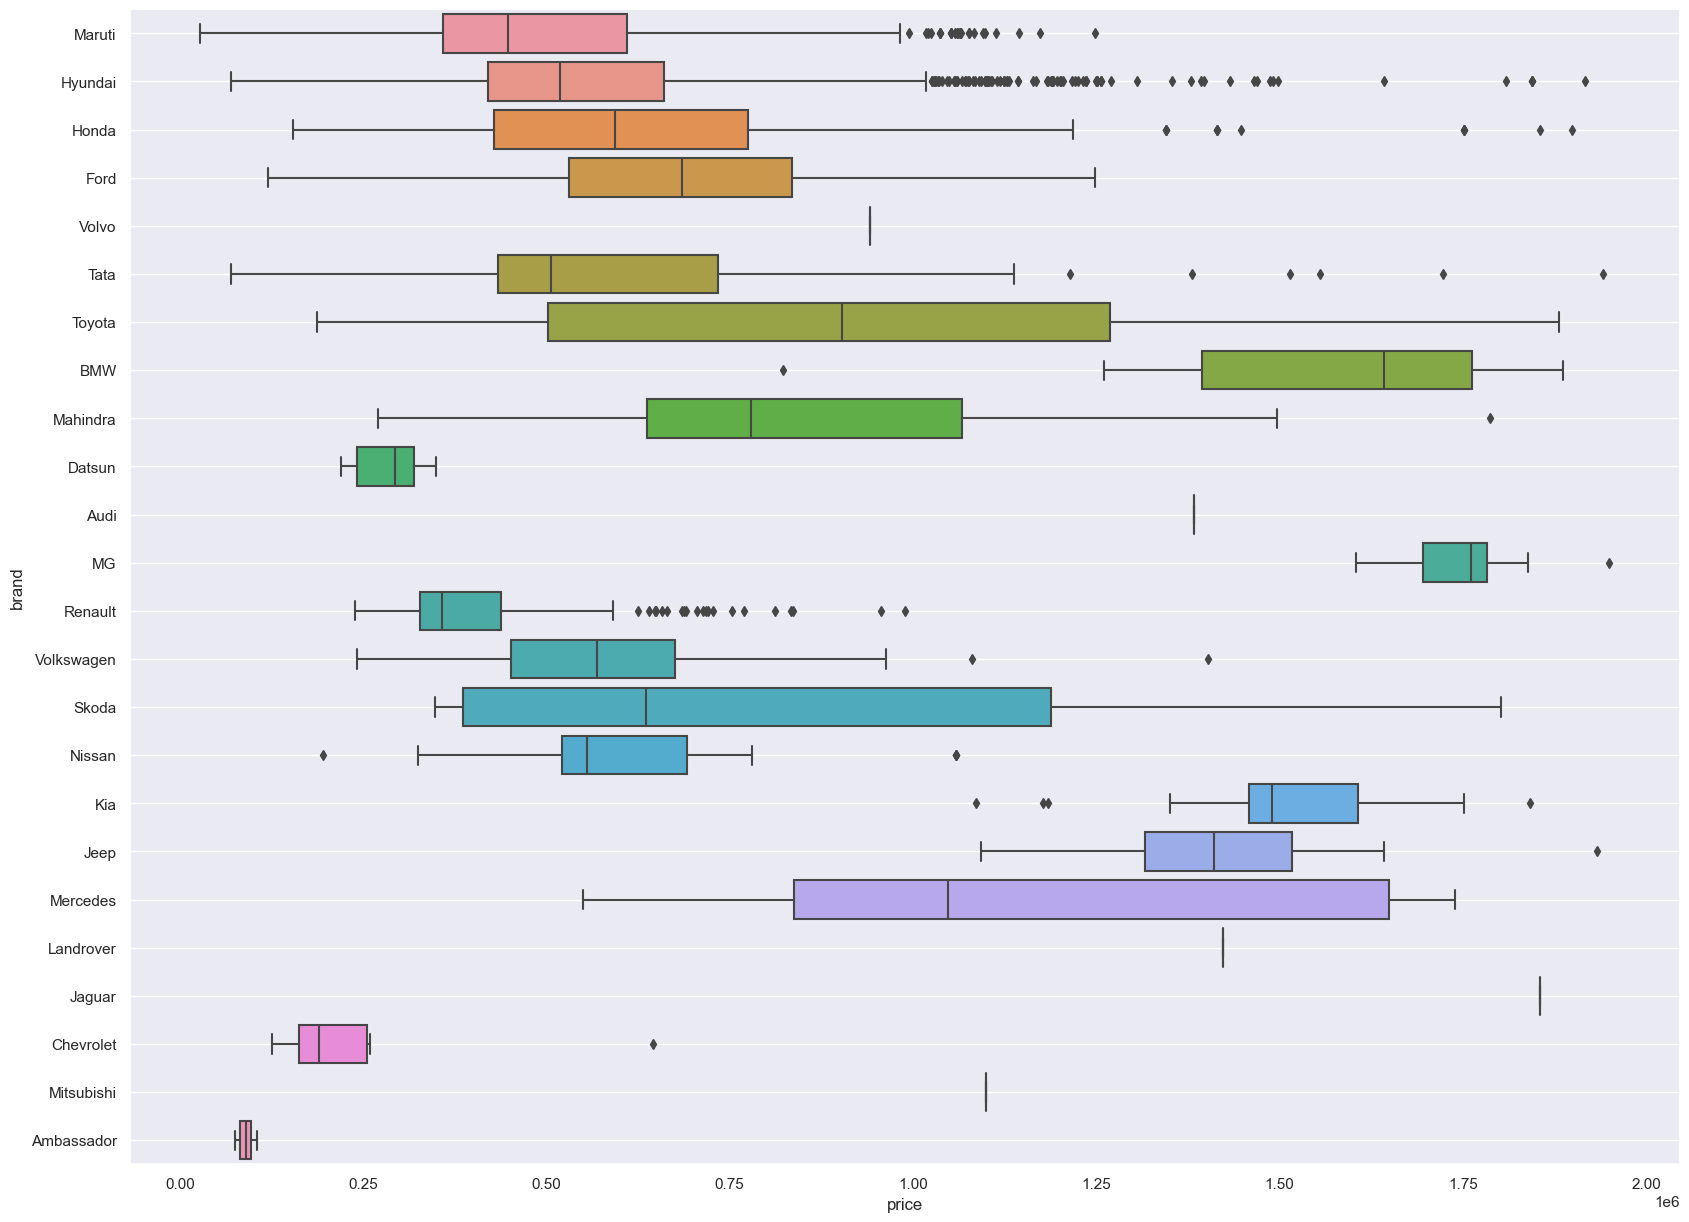

In [66]:
#Visualization for price and brand of the car
plt.figure(figsize=(20,15))
sn.set(font_scale=1)
sn.boxplot(x='price', y='brand', data=used_car)
plt.grid()

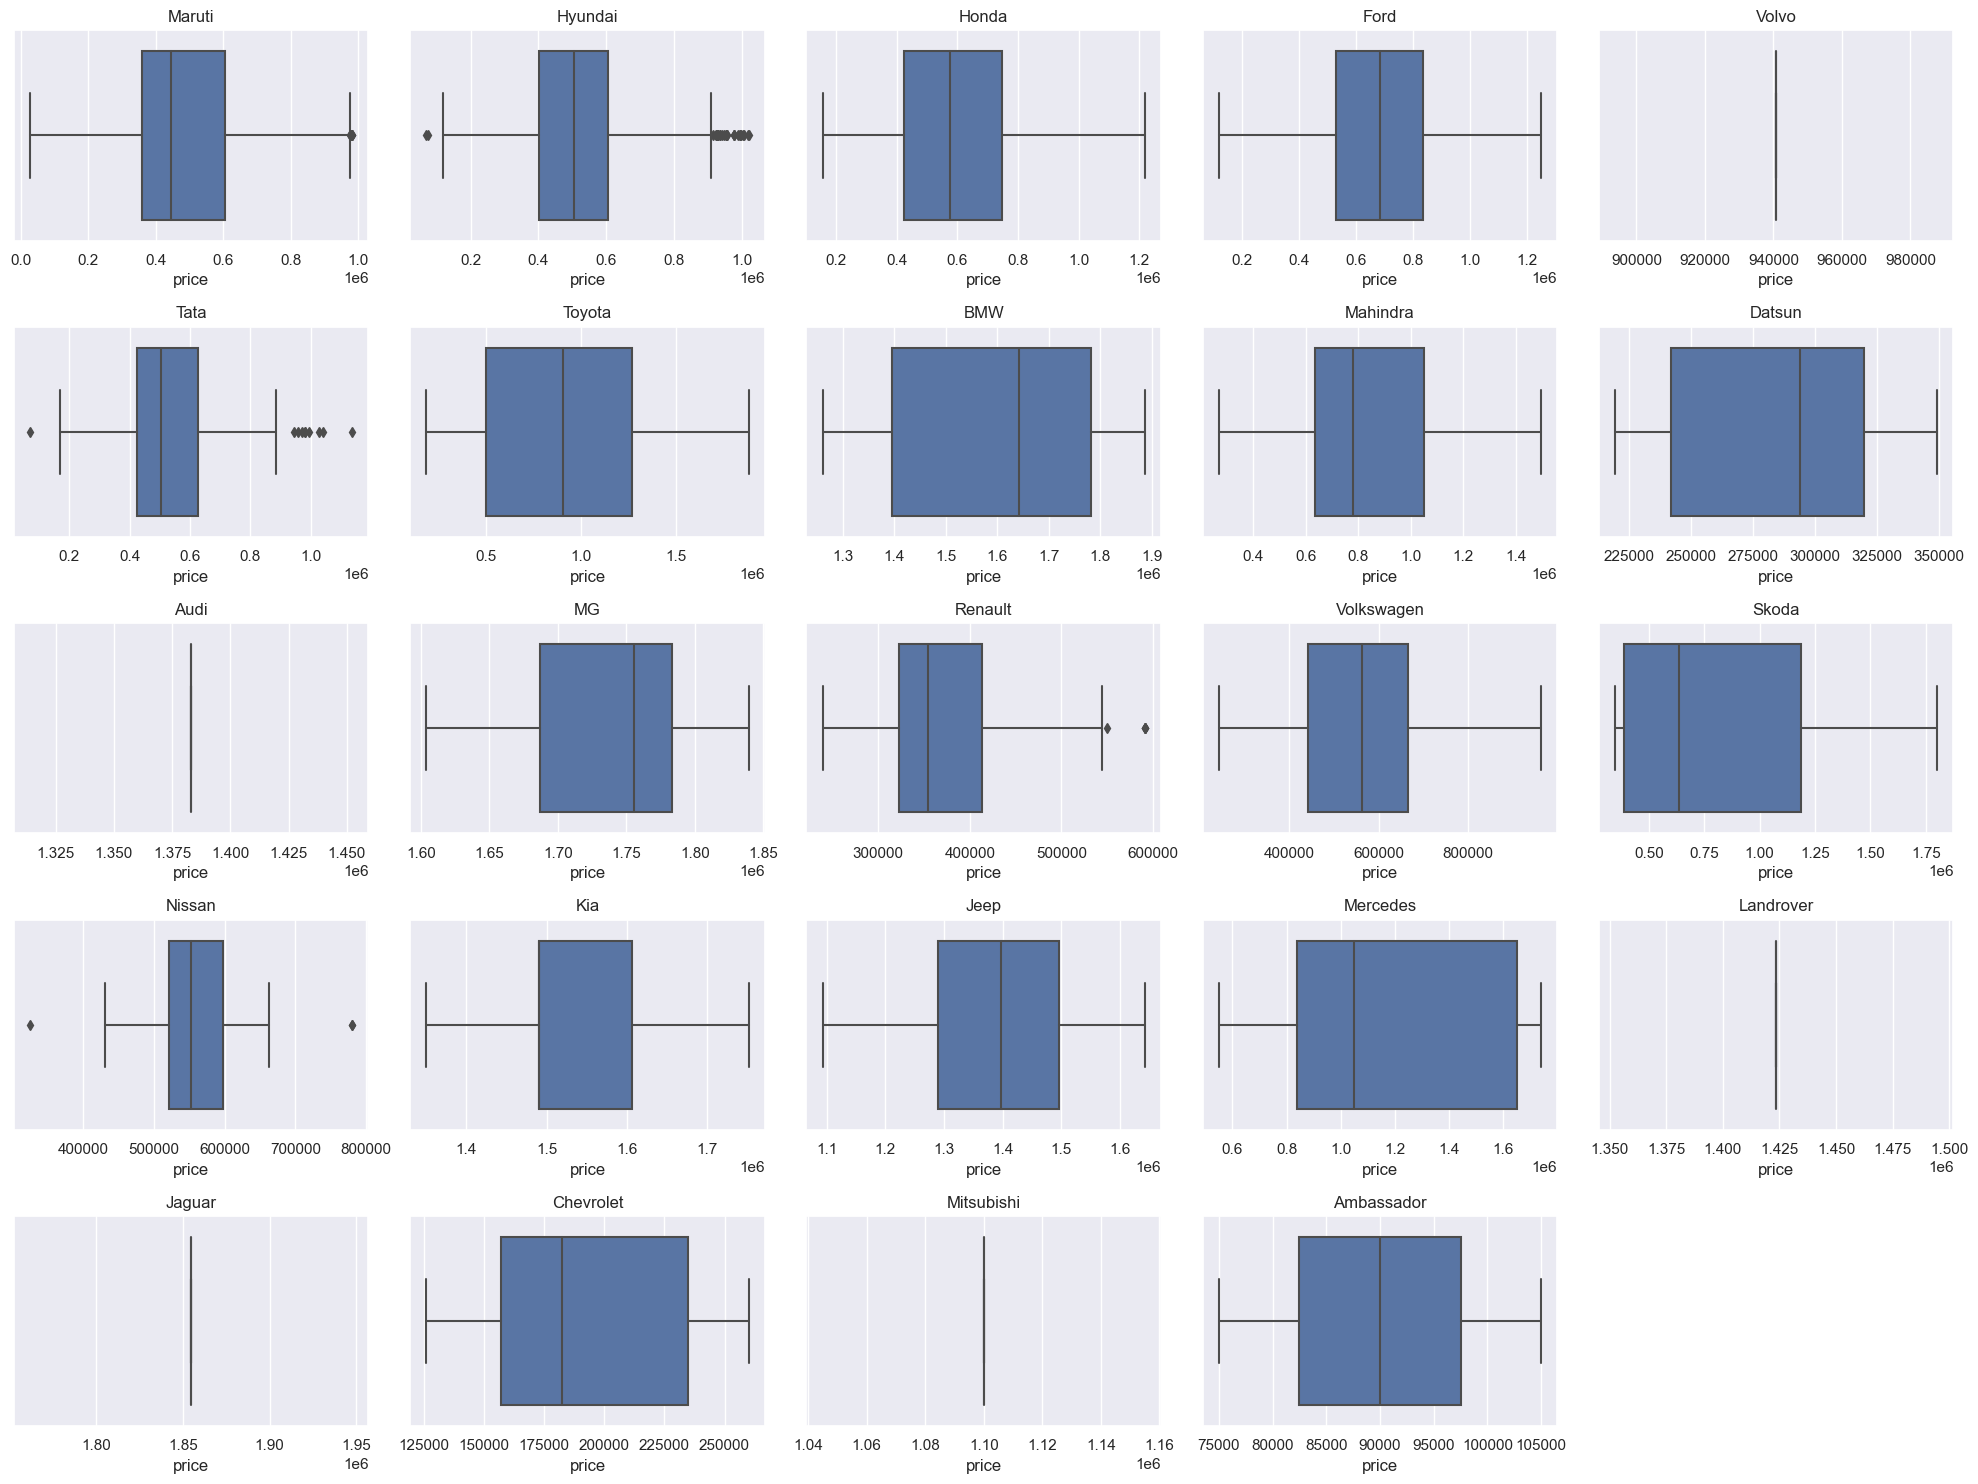

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

#Define the brands in your DataFrame
brands = used_car['brand'].unique()

# Create subplots for each brand
plt.figure(figsize=(20, 15))
for i, brand in enumerate(brands, 1):
    plt.subplot(5, 5, i)
    
    # Select data for the current brand
    brand_data = used_car[used_car['brand'] == brand]
    
    # Calculate the IQR for 'price' in the current brand
    q1 = brand_data['price'].quantile(0.25)
    q3 = brand_data['price'].quantile(0.75)
    iqr = q3 - q1
    
    # Define lower and upper bounds for outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # Filter out outliers for the current brand
    cleaned_brand_data = brand_data[(brand_data['price'] >= lower_bound) & (brand_data['price'] <= upper_bound)]
    
    # Create a boxplot for the cleaned data of the current brand
    sns.boxplot(x='price', data=cleaned_brand_data).set_title(brand)

plt.tight_layout()
plt.show() # the code aims to provide a visual representation of the distribution of prices for each brand in the dataset.
#The boxplots allow for the comparison of the central tendency and spread of prices, 
#while also identifying potential outliers for each brand

C:\Users\User\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


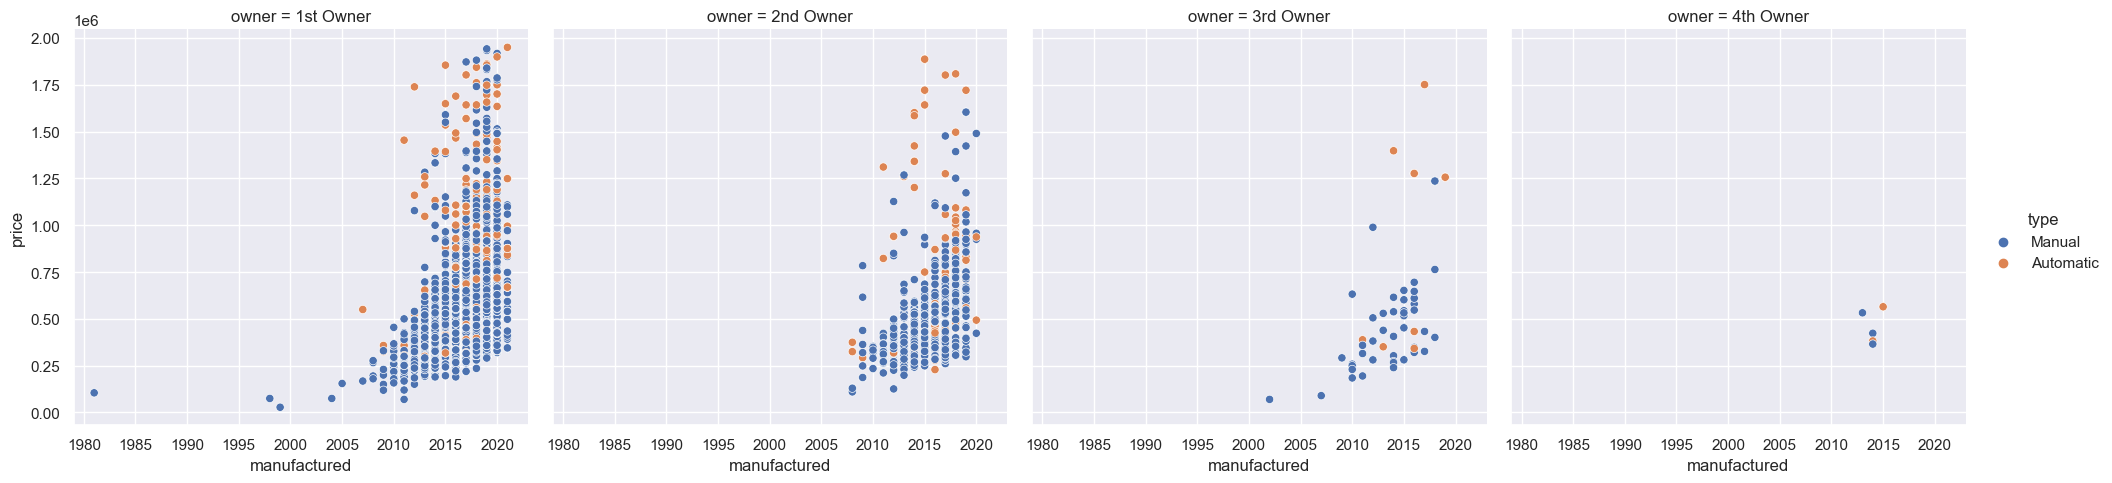

In [68]:
#Owner type
sn.relplot(data=used_car, y='price',x='manufactured',col='owner',hue='type',aspect=1,height=5)
#visualization of provide insights into how the relationship between the price and manufacturing year 
#differs across owner types and car types

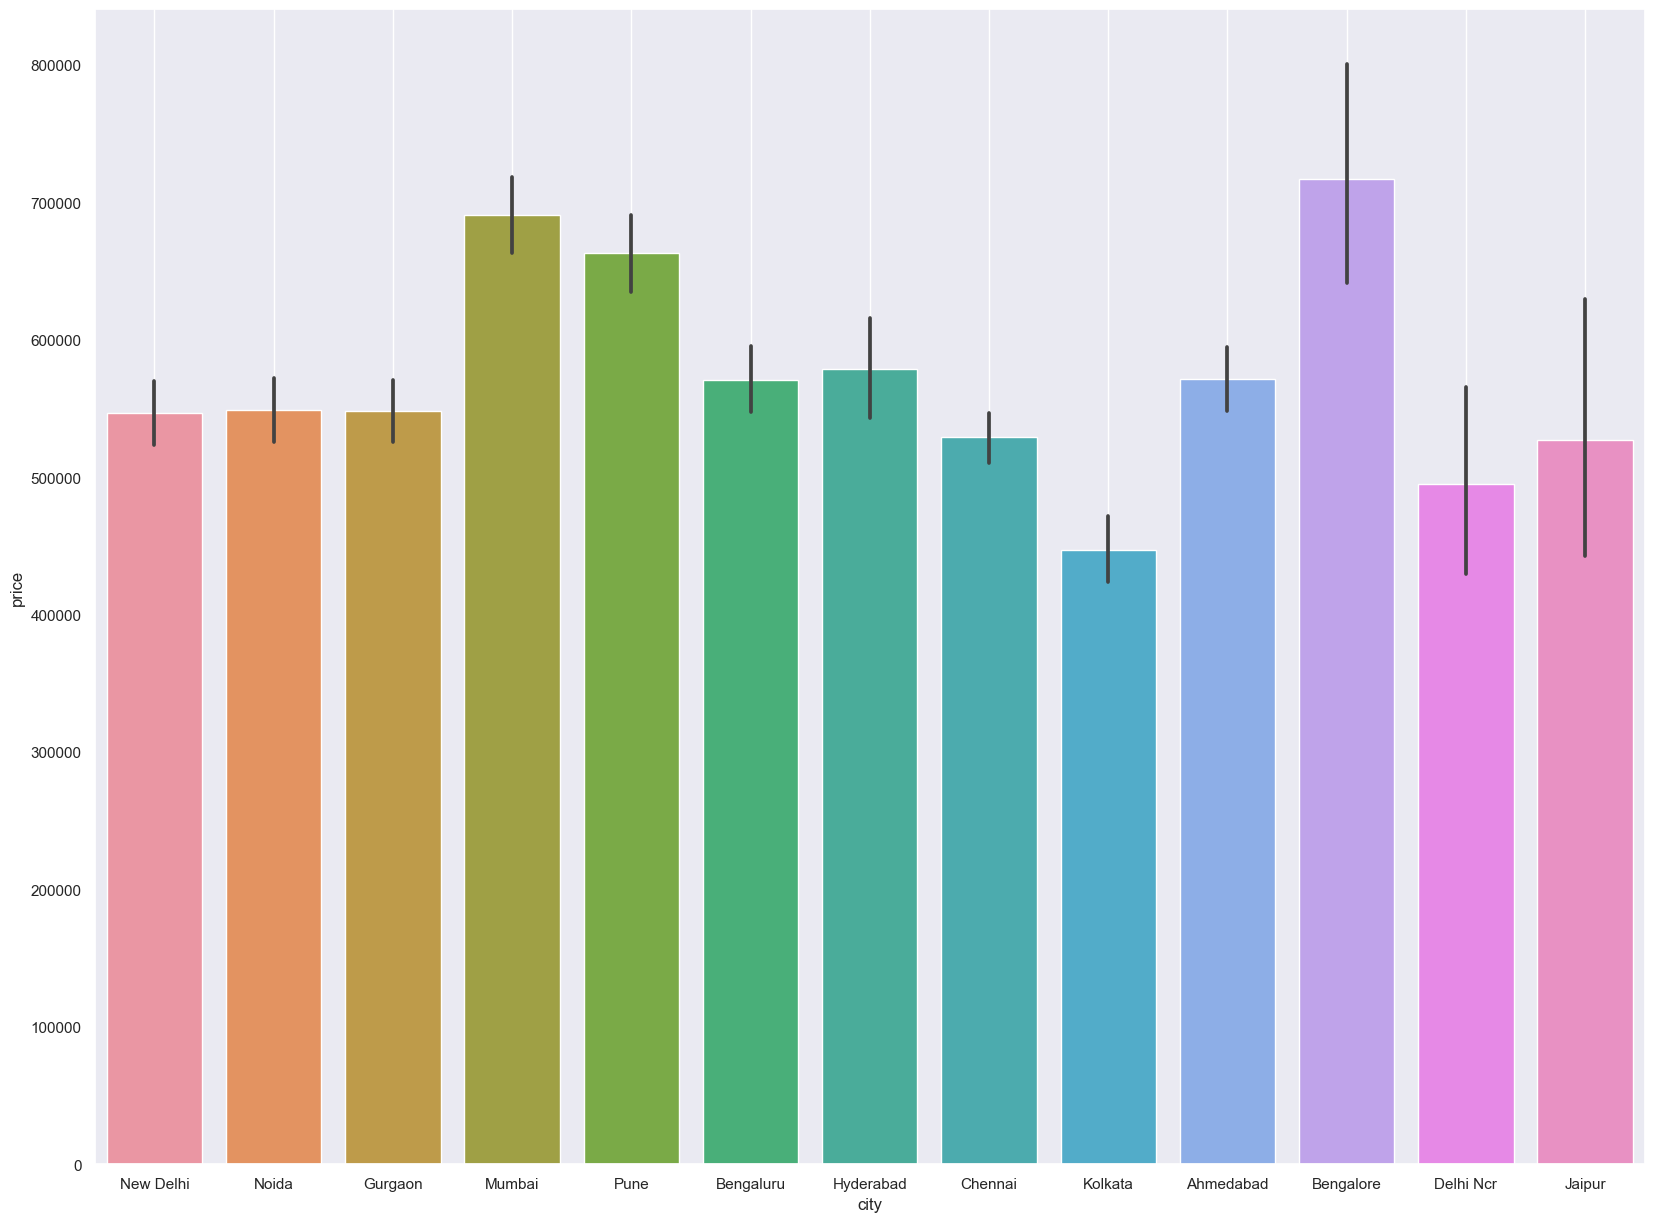

In [69]:
#visualizaion of Price and City
plt.figure(figsize=(20,15))
sn.set(font_scale=1)
sn.barplot(x='city', y='price', data=used_car)
plt.grid()

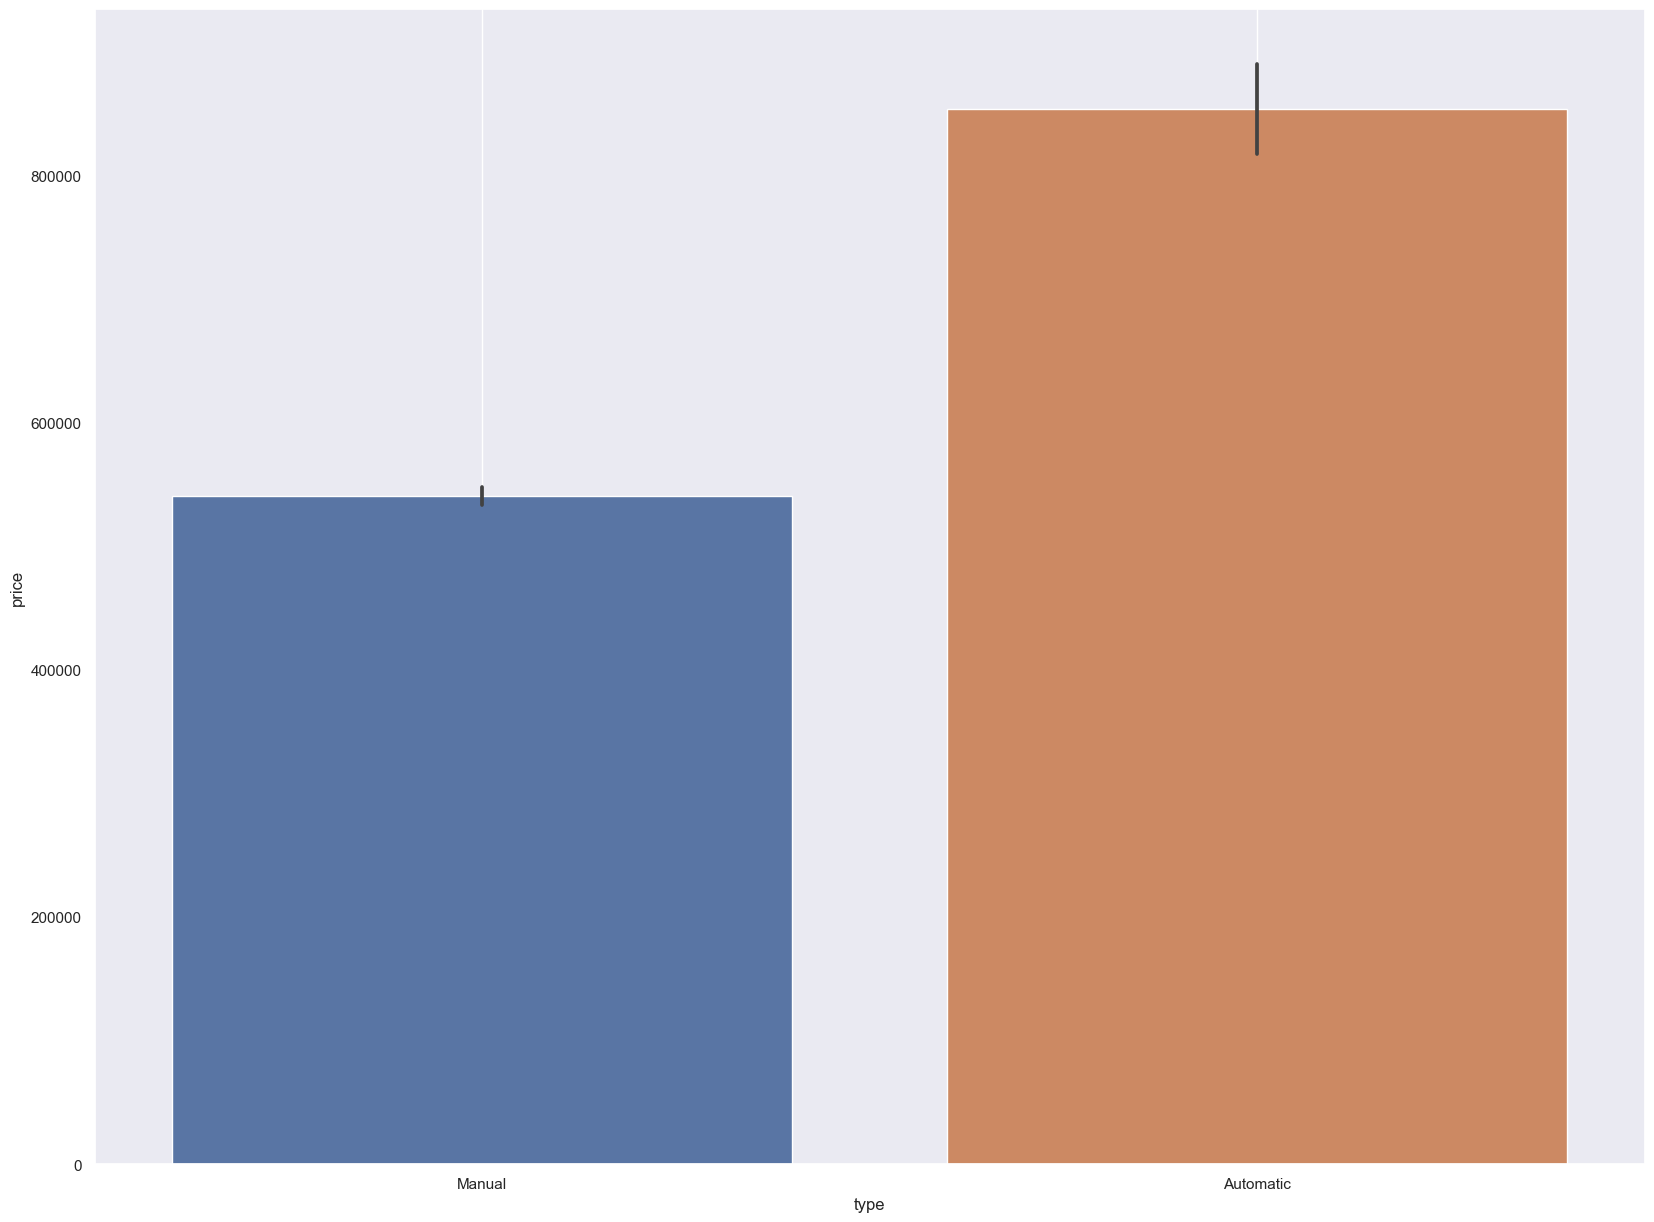

In [70]:
#visualization of Transmission Type and Price
plt.figure(figsize=(20,15))
sn.set(font_scale=1)
sn.barplot(x='type', y='price', data=used_car)
plt.grid()

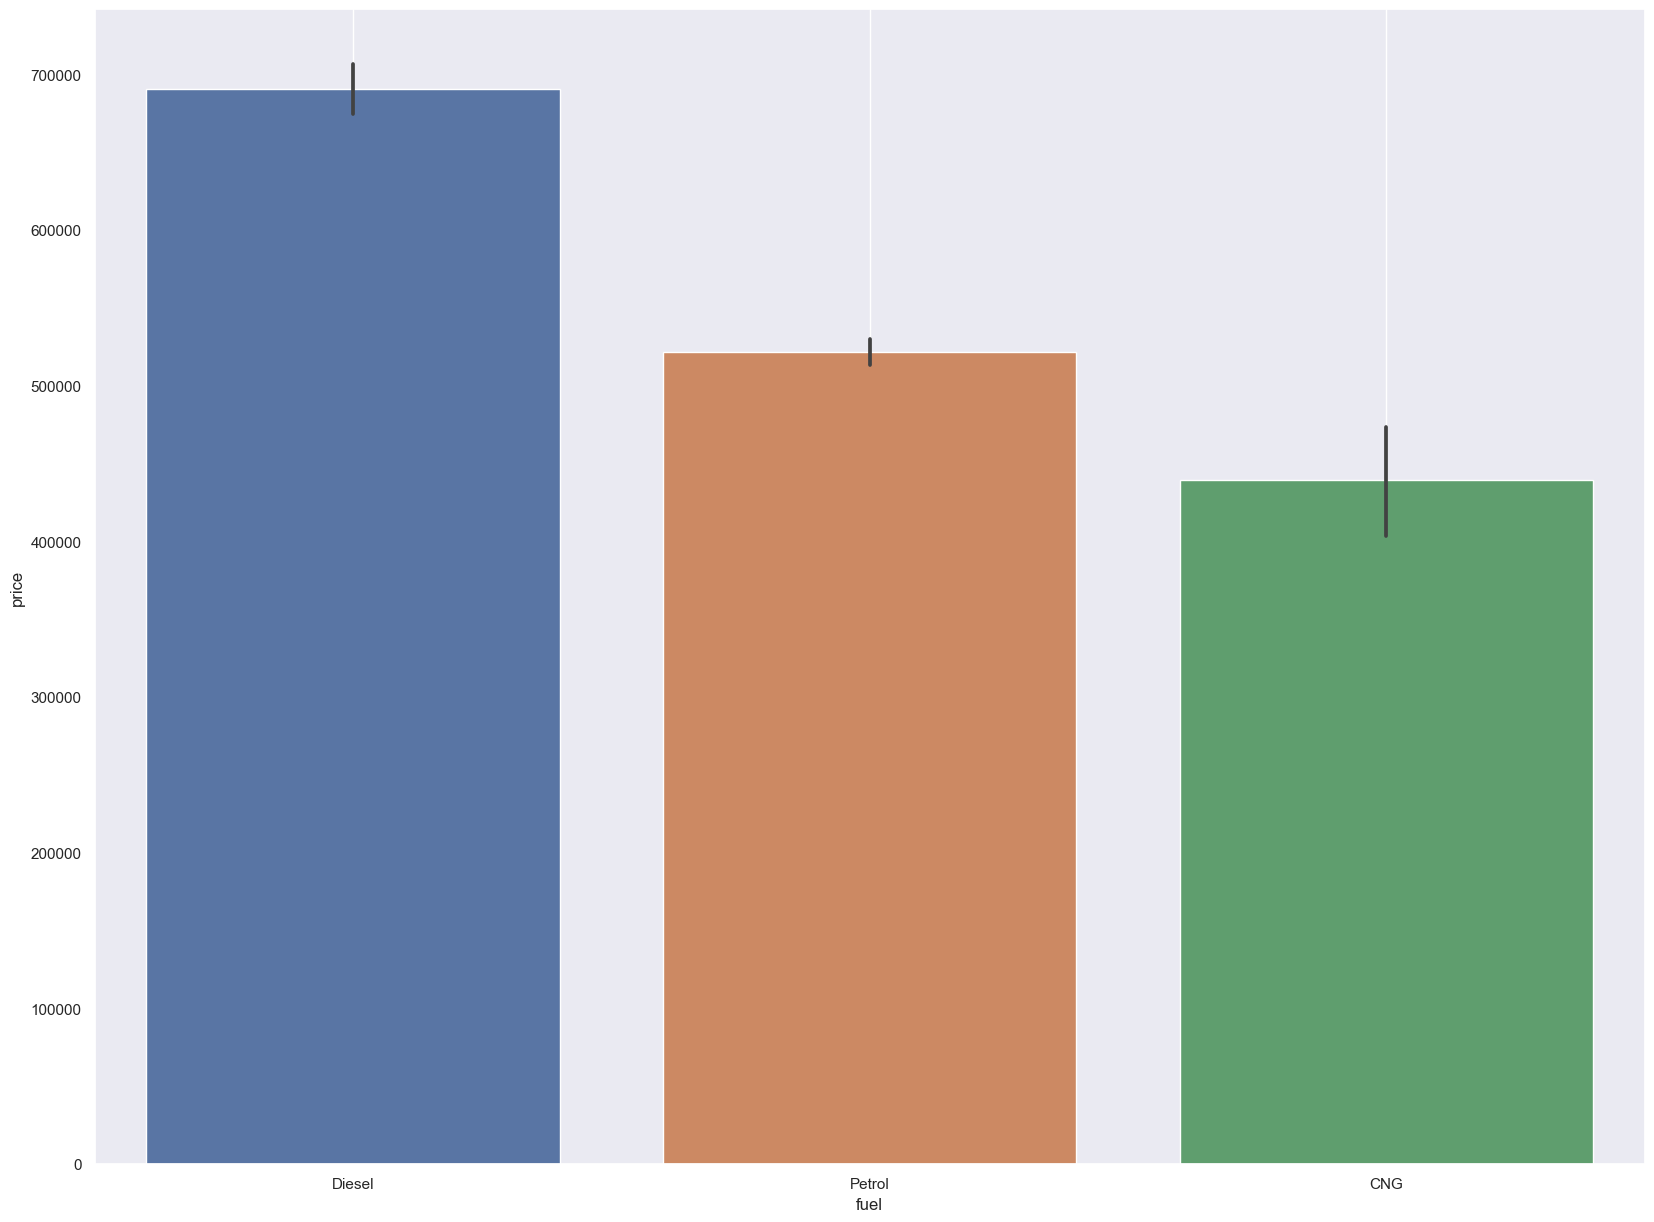

In [71]:
#visualization of Fuel Type and Price
plt.figure(figsize=(20,15))
sn.set(font_scale=1)
sn.barplot(x='fuel', y='price', data=used_car)
plt.grid()

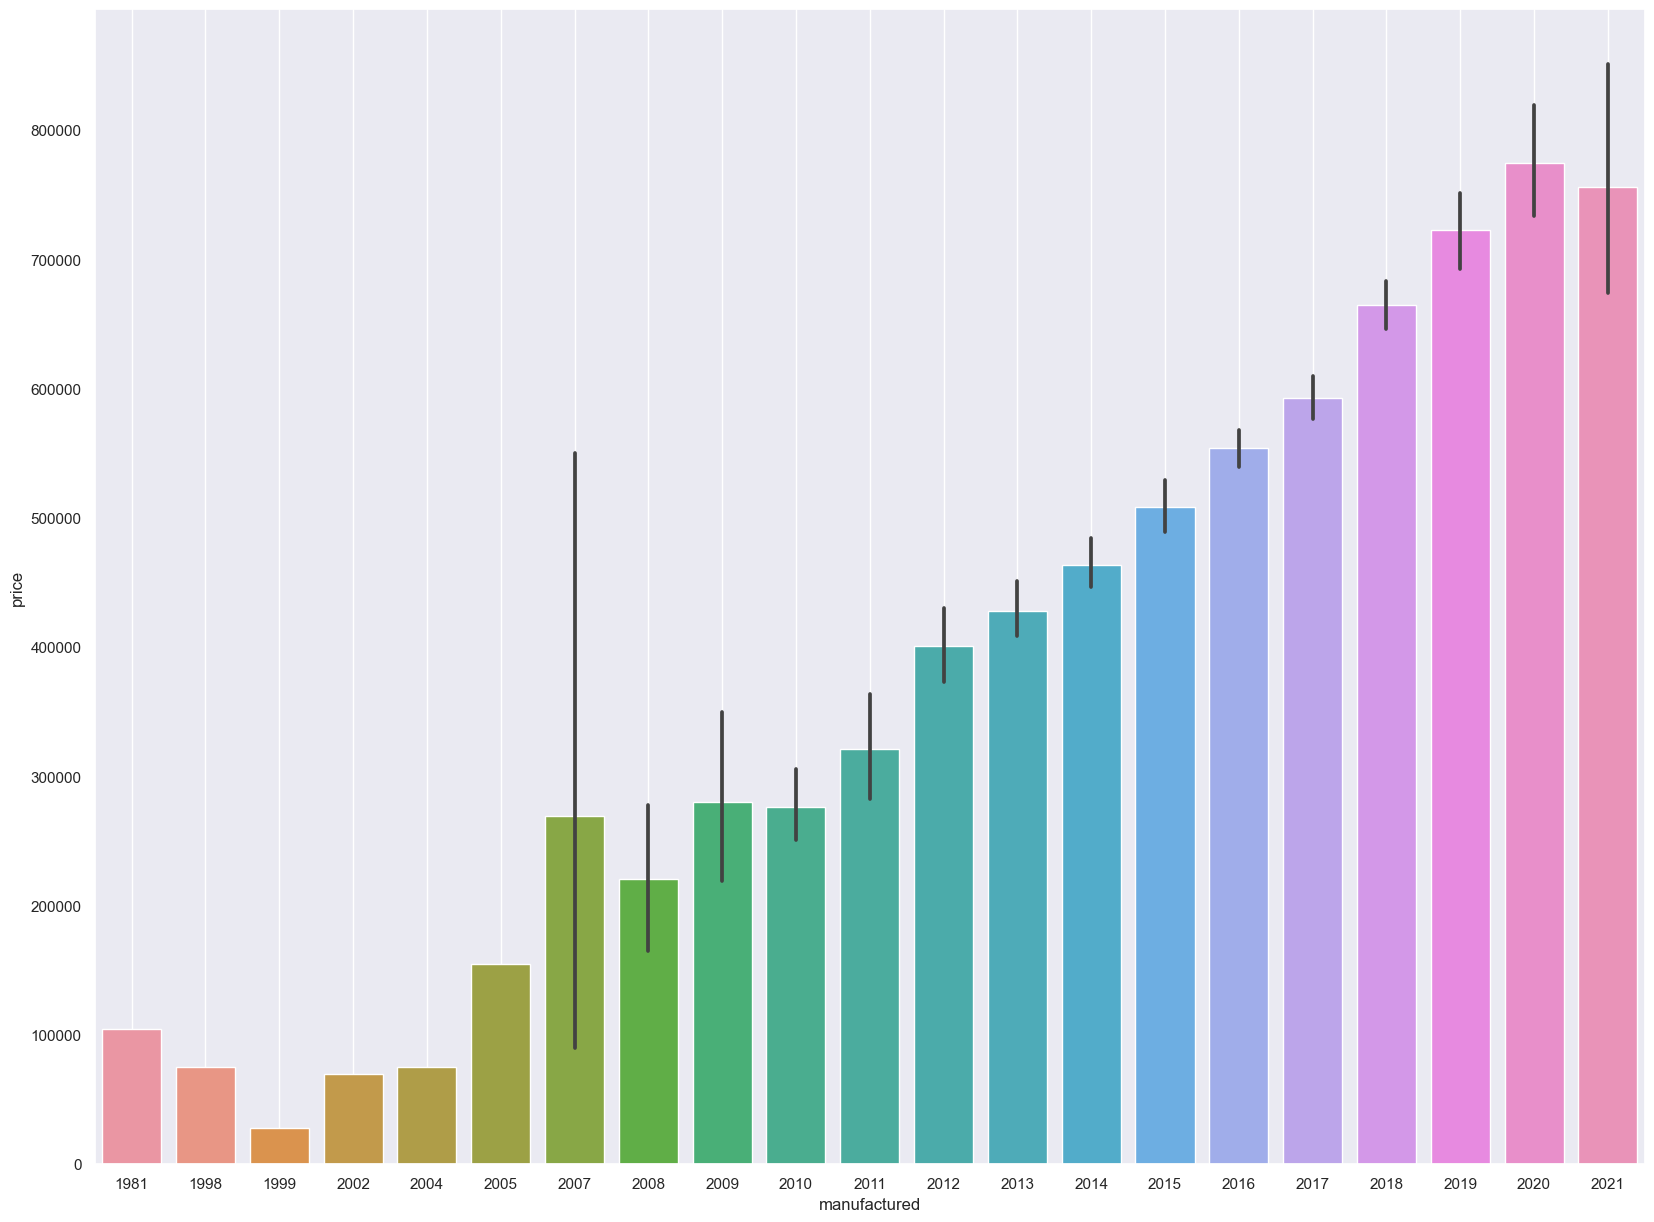

In [72]:
#visualization of Manufactured Year and Price
plt.figure(figsize=(20,15))
sn.set(font_scale=1)
sn.barplot(x='manufactured', y='price', data=used_car)
plt.grid()

<Axes: title={'center': 'correlation between price and manufactured date'}, xlabel='price', ylabel='manufactured'>

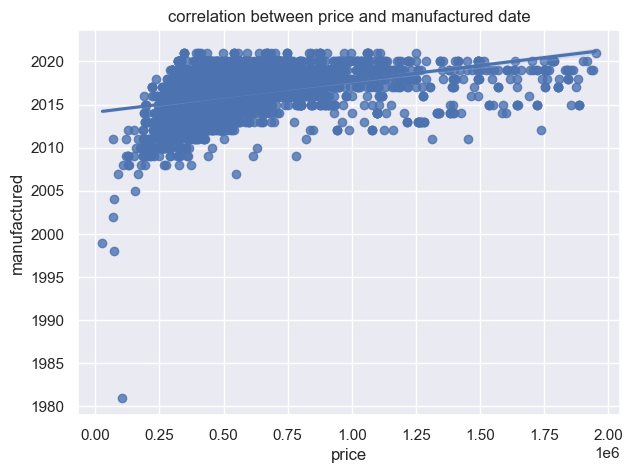

In [73]:
fig=plt.figure (figsize=(7,5))
plt.title('correlation between price and manufactured date')
sn.regplot (x='price', y= 'manufactured', data=used_car)
# this code creates a scatter plot with a regression line to visually represent the correlation between the 'price' and 
#'manufactured' date of used cars,
#providing insights into how these two variables are related

In [74]:
used_car.head(20)

,manufactured,brand,variant,owner,fuel,type,kms,price,city
0,2012,Maruti,Maruti [Swift Dzire],1st Owner,Diesel,Manual,118117,316399,New Delhi
1,2013,Maruti,Maruti [Swift],1st Owner,Diesel,Manual,114506,341599,New Delhi
2,2014,Maruti,Maruti [Ritz],1st Owner,Diesel,Manual,43382,344199,New Delhi
3,2013,Hyundai,Hyundai [i20],1st Owner,Diesel,Manual,64361,355799,New Delhi
4,2014,Maruti,Maruti [Swift],1st Owner,Petrol,Manual,107206,401599,New Delhi
5,2013,Honda,Honda [City],1st Owner,Petrol,Manual,44119,461199,New Delhi
6,2013,Maruti,Maruti [Swift],1st Owner,Diesel,Manual,45417,345299,New Delhi
7,2011,Hyundai,Hyundai [i20],1st Owner,Petrol,Manual,29080,313099,New Delhi
8,2018,Maruti,Maruti [Wagon R 1.0],1st Owner,Petrol,Manual,11773,476799,New Delhi
9,2017,Maruti,Maruti [Ciaz],1st Owner,Diesel,Manual,82599,625999,New Delhi


# PREDICTIVE MODELS

In [75]:
# Model
x = used_car.drop(columns='price')
y = used_car['price']

In [76]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)
#used for training and evaluating machine learning models.

In [77]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
#this code sets up a pipeline for a linear regression model with one-hot encoding for categorical features and scikit functionality
#to make it preprocess the data and build a predictive model in a organized approach

In [78]:
#Encoding the Categorical Data
ohe = OneHotEncoder()
ohe.fit(x[['brand', 'variant', 'owner', 'fuel', 'type', 'city']]) #transofrming categorical data into a format
#suitable for machine learning that models that require numerical output.

OneHotEncoder()

In [79]:
#Creating a categories
ohe.categories_

[array(['Ambassador', 'Audi', 'BMW', 'Chevrolet', 'Datsun', 'Ford',
        'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Kia', 'Landrover', 'MG',
        'Mahindra', 'Maruti', 'Mercedes', 'Mitsubishi', 'Nissan',
        'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
       dtype=object),
 array(['Audi [Q3]', 'BMW [3 Series]', 'BMW [5 Series]', 'BMW [X1]',
        'BMW [X3]', 'Chevrolet [Beat]', 'Chevrolet [Cruze]',
        'Chevrolet [Optra]', 'Chevrolet [Sail Hatchback]',
        'Chevrolet [Spark]', 'Datsun [GO Plus]', 'Datsun [GO]',
        'Datsun [Redi Go]', 'Datsun [RediGO]', 'Ford [Ecosport]',
        'Ford [Fiesta]', 'Ford [Figo Aspire]', 'Ford [Figo]',
        'Ford [Freestyle]', 'Ford [New Figo]', 'Honda [Amaze]',
        'Honda [BR-V]', 'Honda [Brio]', 'Honda [CRV]', 'Honda [City]',
        'Honda [Civic]', 'Honda [Jazz]', 'Honda [Mobilio]', 'Honda [WR-V]',
        'Hyundai [Aura]', 'Hyundai [Creta]', 'Hyundai [EON]',
        'Hyundai [Elite i20]', 'Hyundai [Eon]', 

In [80]:
#Transform the column into OneHotEncoder
column_trans = make_column_transformer((OneHotEncoder(categories=ohe.categories_),
['brand', 'variant', 'owner', 'fuel', 'type','city']), remainder ='passthrough')

In [81]:
lr=LinearRegression() #creates the linear regression model

In [82]:
#Calls for the column that was being transform and directly using linear regression
pipe=make_pipeline(column_trans,lr)

In [83]:
# Using the pipeline to make the preprocessing easy
pipe.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Ambassador', 'Audi', 'BMW', 'Chevrolet', 'Datsun', 'Ford',
       'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Kia', 'Landrover', 'MG',
       'Mahindra', 'Maruti', 'Mercedes', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswag...
                                                                            array(['1st Owner', '2nd Owner', '3rd Owner', '4th Owner'], dtype=object),
                                                                            array(['CNG', 'Diesel', 'Petrol'], dtype=object),
                                                                            array(['Automatic', 'Manual'], dtype=object),
                                                                            array(['Ahmedabad', 'Bengalore', 'Bengaluru', 'Chennai', 'Delhi Ncr',
       'Gurgaon', 'Hyderabad', 'Jaipur', 'Kolkata', 'Mumbai', 'New Delhi',
       'Noida', 'Pune'], dtype=object)]),
                                                  ['brand', 'variant', 'owner',
                                                   'fuel', 'type', 'city'])])),
                ('linearregression', LinearRegression())])

In [84]:
# Testing the prediction
y_pred = pipe.predict(x_test)

In [85]:
r2_score(y_test,y_pred) #calculates the r squared score for evaluating the performance of a regression model.

0.8382052444436984

In [86]:
used_car.shape

(4855, 9)

In [87]:
scores=[] 
for i in range(10):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state = i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(x_train, y_train)
    y_pred = pipe.predict(x_test)
    scores.append(r2_score(y_test,y_pred))

In [88]:
np.argmax(scores) # identifies the iteration with the highest R-squared score in the list of scores.

9

In [89]:
scores[np.argmax(scores)]

0.8550611758631984

In [90]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state = 21)
lr=LinearRegression() #creates a linear regression model
pipe=make_pipeline(column_trans,lr) #construct a pipeline that includes the specific column for predicting the price
pipe.fit(x_train, y_train) #fits the pipe to the training data
y_pred = pipe.predict(x_test) #makes prediction of the testing data.
r2_score(y_test,y_pred) 

0.823776368258232

In [91]:
import pickle

In [92]:
#Saving the model
pickle.dump(pipe,open('LinearRegressionModel.pkl', 'wb'))

In [93]:
#Actual price and Predicted price
used_car.tail(5)

,manufactured,brand,variant,owner,fuel,type,kms,price,city
4850,2013,Hyundai,Hyundai [i10],1st Owner,Petrol,Manual,56020,291500,Noida
4851,2013,Hyundai,Hyundai [Verna],1st Owner,Petrol,Manual,79174,450000,Noida
4852,2014,Maruti,Maruti [Wagon R],1st Owner,Petrol,Manual,74492,278000,Noida
4853,2012,Hyundai,Hyundai [i10],1st Owner,Petrol,Manual,27456,237000,Noida
4854,2015,Honda,Honda [City],1st Owner,Petrol,Manual,75856,656500,Noida


In [94]:
pipe.predict(pd.DataFrame([[2014, 'Maruti', 'Maruti [Wagon R]', '1st Owner', 'Petrol', 'Manual', 74492, 'Noida' ]], 
columns=['manufactured', 'brand', 'variant', 'owner', 'fuel', 'type', 'kms', 'city'])) # later use for prediction

array([262240.77666493])

In [95]:
used_car.head(5)

,manufactured,brand,variant,owner,fuel,type,kms,price,city
0,2012,Maruti,Maruti [Swift Dzire],1st Owner,Diesel,Manual,118117,316399,New Delhi
1,2013,Maruti,Maruti [Swift],1st Owner,Diesel,Manual,114506,341599,New Delhi
2,2014,Maruti,Maruti [Ritz],1st Owner,Diesel,Manual,43382,344199,New Delhi
3,2013,Hyundai,Hyundai [i20],1st Owner,Diesel,Manual,64361,355799,New Delhi
4,2014,Maruti,Maruti [Swift],1st Owner,Petrol,Manual,107206,401599,New Delhi


In [96]:
pipe.predict(pd.DataFrame([[2013, 'Hyundai', 'Hyundai [i20]', '1st Owner', 'Diesel', 'Manual', 64361, 'New Delhi' ]], 
columns=['manufactured', 'brand', 'variant', 'owner', 'fuel', 'type', 'kms', 'city']))#later use for prediction

array([389059.63035057])

In [97]:
#Batch prediction
test_model = pickle.load(open('LinearRegressionModel.pkl','rb'))

In [98]:
new_xdata=used_car.sample(10)
print(new_xdata)

      manufactured       brand               variant      owner    fuel  \
2172          2017      Maruti     Maruti [Alto 800]  1st Owner  Petrol   
4441          2016       Honda          Honda [City]  1st Owner  Petrol   
1527          2019     Hyundai       Hyundai [Venue]  1st Owner  Petrol   
1610          2019     Hyundai       Hyundai [Venue]  1st Owner  Diesel   
19            2020     Hyundai        Hyundai [Aura]  1st Owner  Petrol   
4101          2019      Maruti         Maruti [Eeco]  1st Owner  Petrol   
2125          2014      Maruti  Maruti [Wagon R 1.0]  1st Owner  Petrol   
1636          2017      Maruti        Maruti [Ignis]  1st Owner  Petrol   
4363          2011  Volkswagen     Volkswagen [Polo]  1st Owner  Petrol   
968           2012     Hyundai         Hyundai [i10]  2nd Owner  Petrol   

           type    kms    price       city  
2172     Manual  11721   320999       Pune  
4441  Automatic  45641   879000    Gurgaon  
1527  Automatic   8917  1191299     Mum

In [99]:
pred=test_model.predict(new_xdata)
x = np.array(list(map(np.int_, pred)))
print(x)

[ 413102  809530 1080382 1005830  695040  423880  358700  598281  302833
  202421]
